# Project description

The main idea of this project is to analyse (make an EDA) the dataset which contains characteristics of students' living conditions and decide which of them have an impact on math exam score in order to reveal students who are under risk of getting unsatisfying scores. 

**It is essential to:**

1. Preview data
2. Clean data from outliers and fill missing values
3. Plot distribution of numeric and categorial data
4. Check the correlation between numeric features
5. Conduct Student's t-test for categorial features

# Module import 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import missingno as msno
from itertools import combinations

sns.set(style='whitegrid')
warnings.simplefilter('ignore')

# Data preprocessing

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Project_3. Exploratory Data Analysis.ipynb',
 'README.md',
 'stud_math.csv']

In [3]:
# os.getcwd()
# os.rename('C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv.csv',
#           'C:\\Users\\glavr\\GitHub\\skillfactory_rds\\module_2\stud_math.csv')

In [4]:
data = pd.read_csv('stud_math.csv')
display(data.head())
display(data.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

> Let's look at missing values using a matrix from [**missingno**](https://github.com/ResidentMario/missingno) package:

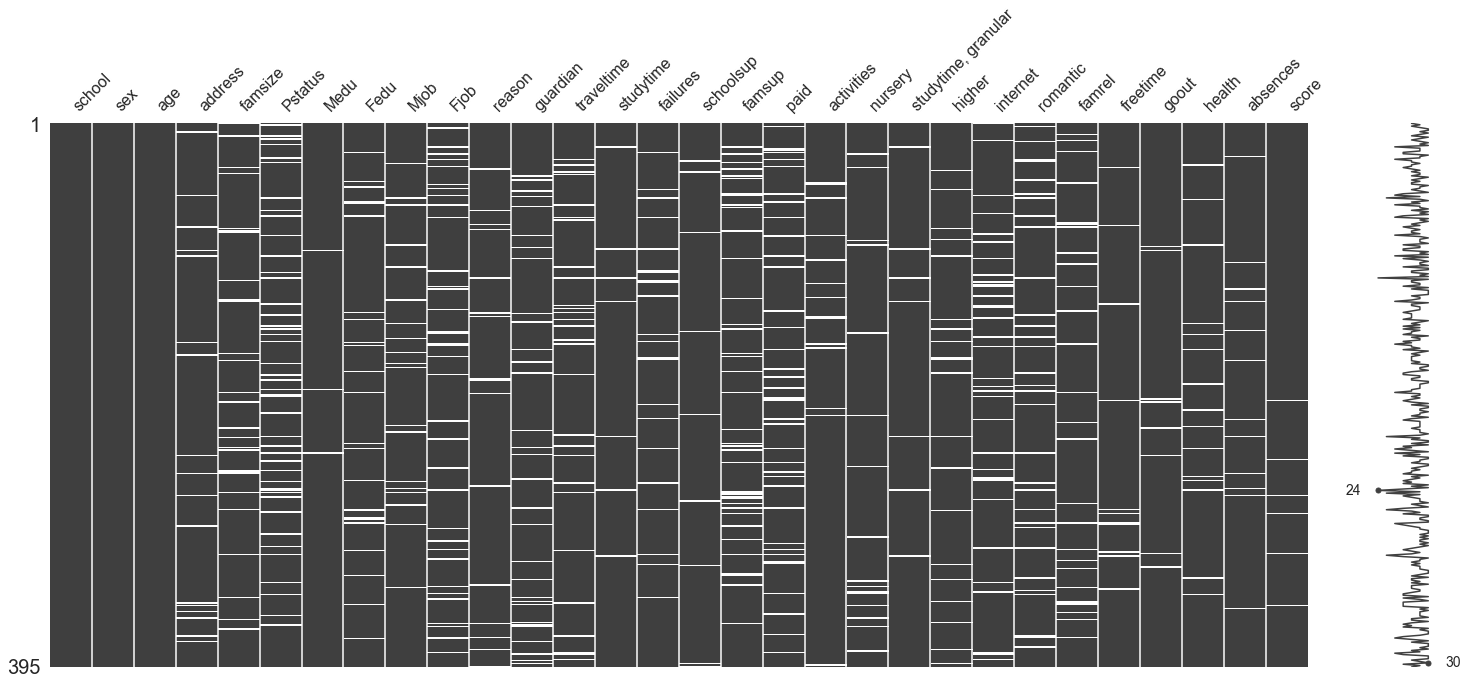

In [5]:
msno.matrix(data)

In [6]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [7]:
data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


> It makes sense to bring all columns to the same format for comfort:

In [8]:
data.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'travel_time', 'study_time',
                'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
                'study_time_2', 'higher', 'internet', 'romantic', 'fam_rel',
                'free_time', 'go_out', 'health', 'absences', 'score']

## Column review

> It is necessary to go over each column step by step in order to unify the data, clean significant outliers and fill (delete) missing values


**I will make some functions in order to draw big plots with minimum coding:**

In [9]:
def distplot(column, kde=True, bins=10):
    """
    This function create a basic seaborn distplot
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes= fig.add_axes([0, 0, 1.4, 1.2])
    sns.distplot(column, kde=kde, bins=bins)
    plt.xticks(size=15)
    plt.yticks(size=15)

In [10]:
def countplot(column, hue=None):
    """
    This function creates a basic seaborn countplot 
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1.4, 1.2])
    sns.countplot(column, hue=hue)
    plt.yticks(size=15)
    plt.xticks(size=15)

In [11]:
def boxplot(column, showmeans=True):
    """
    This function creates a basic seaborn boxplot 
    for an entered column with certain parameters
    """
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1.4, 1.2])
    sns.boxplot(column, showmeans=showmeans)
    plt.yticks(size=15)
    plt.xticks(size=15)

### School

In [12]:
print(f'Number of unique values: {len(data.school.unique())}')
print(f'The values themselves: {data.school.unique()}')

Number of unique values: 2
The values themselves: ['GP' 'MS']


In [13]:
data.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


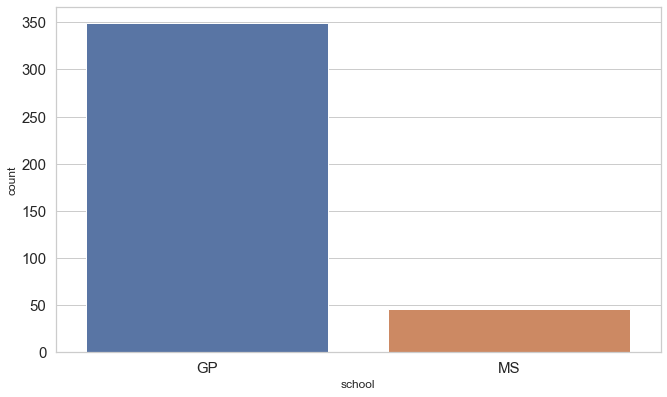

In [14]:
countplot(data.school)

> The overwhelming majority of students are from GP school (about 7 times more students than in MS)

### Sex

In [15]:
data.sex.unique()

array(['F', 'M'], dtype=object)

In [16]:
data.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


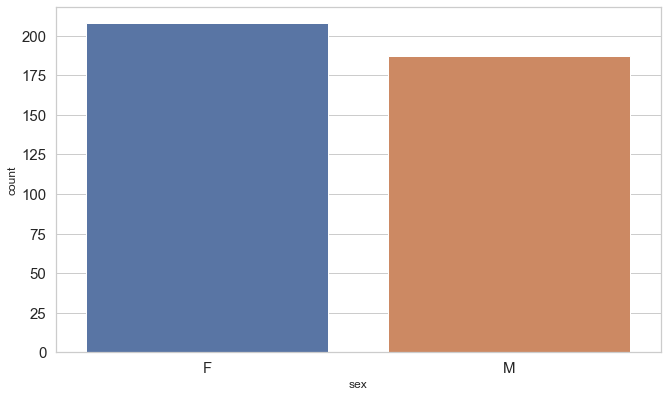

In [17]:
countplot(data.sex)

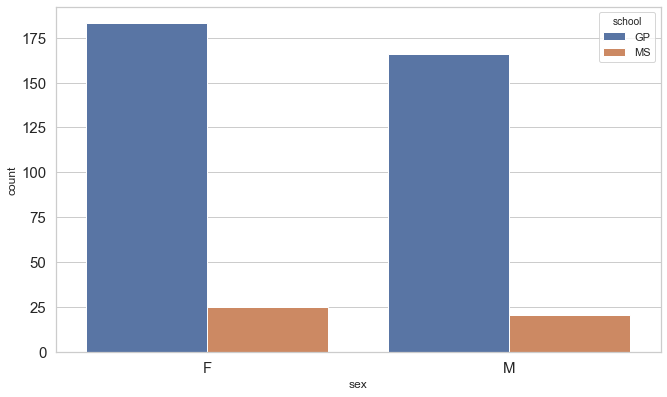

In [18]:
countplot(data.sex, hue=data.school)

> * The distribution of boys and girls is quite similar in general as well as for each school separately
> * There is almost no gender disproportion

### Age 

In [19]:
data.age.unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [20]:
print(f'Age interval: {data.age.min(), data.age.max()}')

Age interval: (15, 22)


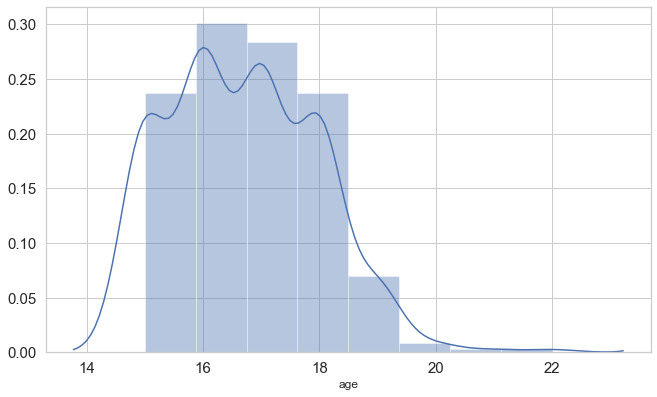

In [21]:
distplot(data.age, bins=8)

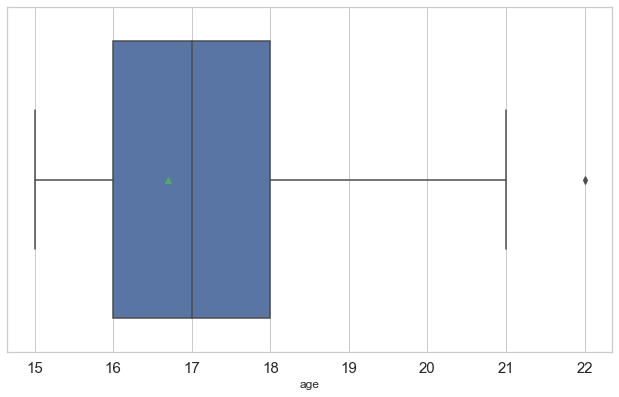

In [22]:
boxplot(data.age)

In [23]:
print(f'Median age for dataset: {data.age.median()}')
print(f'Average age for dataset: {data.age.mean()}')

Median age for dataset: 17.0
Average age for dataset: 16.696202531645568


In [24]:
data.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


> * The distribution is close to normal
> * There is only one 22-year-old student (who can be considered as an outlier)

### Address

In [25]:
data.address.unique()

array(['U', nan, 'R'], dtype=object)

In [26]:
def nan_killer(x):
    """
    This function substitutes nan-values
    (also in a string format) with None 
    values in a column
    """
    if pd.isnull(x) or str(x).lower() == 'nan' or str(x).strip() == '':
        return None
    return x

In [27]:
data.address = data.address.apply(nan_killer)
data.address.unique()

array(['U', None, 'R'], dtype=object)

In [28]:
print(f'Number of missing values: {len(data.loc[data.address.isnull()])}')

Number of missing values: 17


In [29]:
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


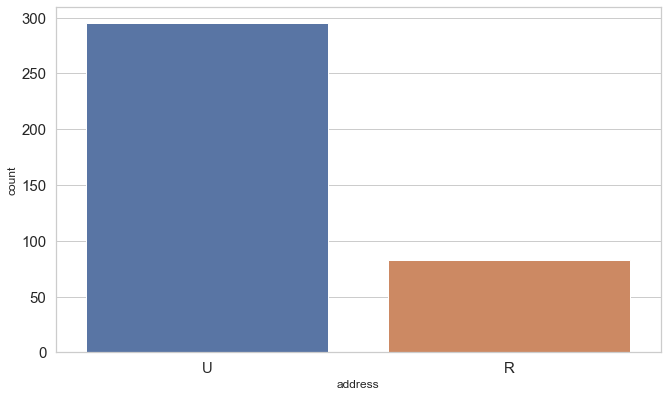

In [30]:
countplot(data.address)

> * Most students are from urban area
> * It is possible to fill missing values according to current proportion of students living in urban and rural areas
> * Another way is to take into account the travel time of students from different areas

**Let's take a look at travel time of urban and rural students**

Text(0.5, 1.0, 'Urban')

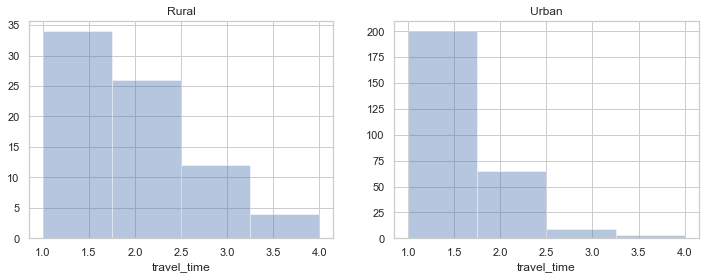

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(data.loc[data.address == 'R'].travel_time,
             ax=axes[0], bins=4, kde=False)
axes[0].set_title('Rural')

sns.distplot(data.loc[data.address == 'U'].travel_time,
             ax=axes[1], bins=4, kde=False)
axes[1].set_title('Urban')

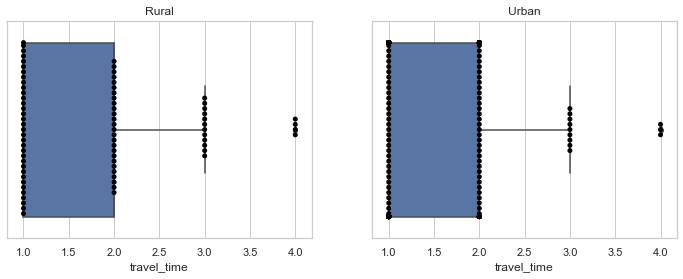

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data.loc[data.address == 'R'].travel_time, ax=axes[0])
axes[0].set_title('Rural')
sns.swarmplot(data.loc[data.address == 'R'].travel_time,
              color="black", ax=axes[0])

sns.boxplot(data.loc[data.address == 'U'].travel_time, ax=axes[1])
axes[1].set_title('Urban')
sns.swarmplot(data.loc[data.address == 'U'].travel_time,
              color="black", ax=axes[1])

In [33]:
print(f"""Median travel time for urban and rural students: {data.loc[data.address == 'U'].travel_time.median(),
                                                          data.loc[data.address == 'R'].travel_time.median()}""")
print(f"""Mean travel time for urban and rural students: {data.loc[data.address == 'U'].travel_time.mean(),
                                                          data.loc[data.address == 'R'].travel_time.mean()}""")

Median travel time for urban and rural students: (1.0, 2.0)
Mean travel time for urban and rural students: (1.332129963898917, 1.8157894736842106)


Let's conduct Student's t-test to figure out if this time difference is statistically significant (all the premises are valid):

H0: mean(urban) = mean(rural)

Ha: mean(urban) < mean(rural)

In [34]:
print(f"""p-value: {scipy.stats.ttest_ind(data.loc[data.address == 'U'].travel_time, 
                                          data.loc[data.address == 'R'].travel_time,
                                          nan_policy='omit').pvalue}""")

p-value: 4.636949025209702e-08


p-value < alpha = 0.05 => We reject H0

So it became obvious than in average urban students spend less than rural students on their way and there is a statistically 
significant difference to fill missing values in accordance with this (time) parameter:

In [35]:
def fill_address(row):
    """
    This function fills the address column
    in accordance with the value in travel time
    column
    """
    if row.travel_time <= 2:
        row.address = 'U'
    else:
        row.address = 'R'
    return row

In [36]:
data = data.apply(fill_address, axis=1)
data.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


> Finally, all the missing values in address column are filled

###  Family size

In [37]:
data.fam_size.unique()

array([nan, 'GT3', 'LE3'], dtype=object)

In [38]:
data.fam_size = data.fam_size.apply(nan_killer)
data.fam_size.unique()

array([None, 'GT3', 'LE3'], dtype=object)

In [39]:
data.loc[:, ['fam_size']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


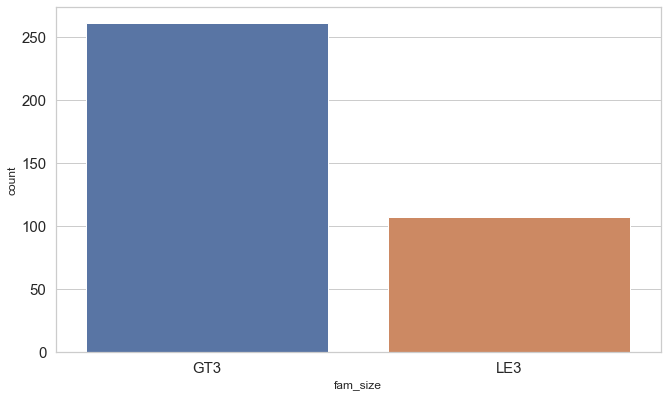

In [40]:
countplot(data.fam_size)

> Most students have families with less than 3 family members

Let's fill missing values with backfill method from Pandas:

In [41]:
data.fam_size.fillna(method='bfill', inplace=True)
data.loc[:, ['fam_size']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


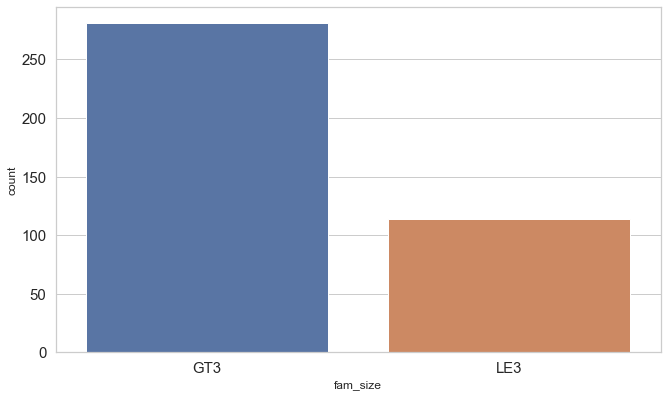

In [42]:
countplot(data.fam_size)

### Parents' joint housing status (live apart or together)

In [43]:
data.p_status.unique()

array(['A', nan, 'T'], dtype=object)

In [44]:
data.p_status = data.p_status.apply(nan_killer)
data.p_status.unique()

array(['A', None, 'T'], dtype=object)

In [45]:
data.loc[:, ['p_status']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


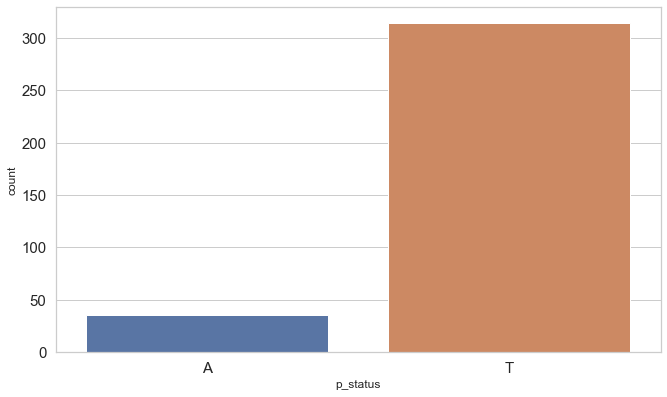

In [46]:
countplot(data.p_status)

> Most parents live together

Let's fill missing values with forward fill method from Pandas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


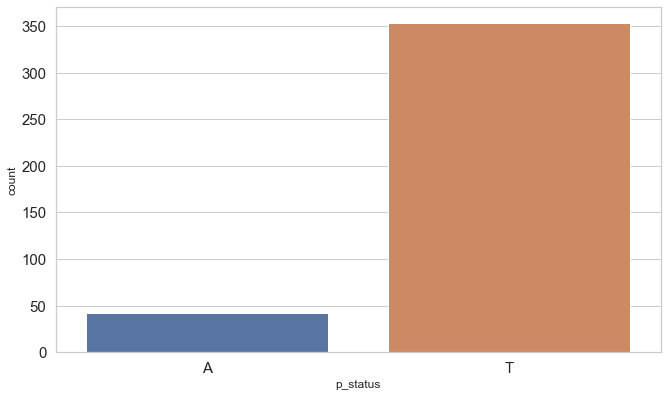

In [47]:
data.p_status.fillna(method='ffill', inplace=True)
countplot(data.p_status)
data.loc[:, ['p_status']].info()

### Mother's education


In [48]:
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

In [49]:
data.m_edu = data.m_edu.apply(nan_killer)
data.m_edu.unique()

array([ 4.,  1.,  3.,  2., nan,  0.])

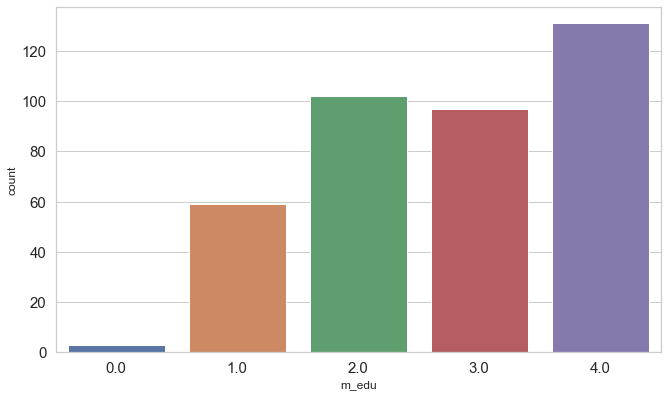

In [50]:
countplot(data.m_edu)

In [51]:
data.loc[:, ['m_edu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB



> * The majority of mothers have higher education
> * The minority of them are not educated at all

In [52]:
print(f"Median mother's education: {data.m_edu.median()}")

Median mother's education: 3.0


Let's fill missing values with median since mean and median are quite similar:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


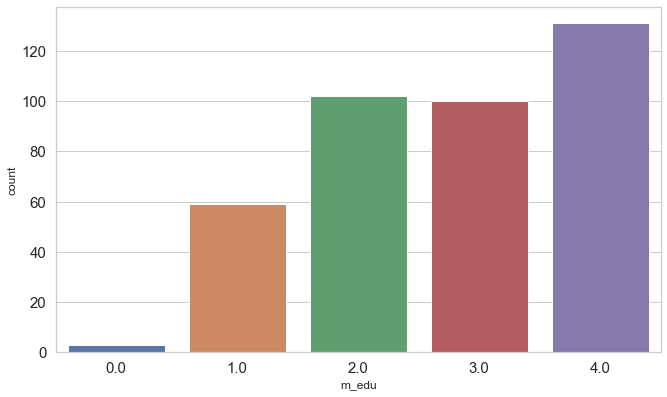

In [53]:
data.m_edu.fillna(value=data.m_edu.median(), inplace=True)
data.loc[:, ['m_edu']].info()
countplot(data.m_edu)

### Father's education

In [54]:
data.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [55]:
data.f_edu = data.f_edu.apply(nan_killer)
data.f_edu.unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

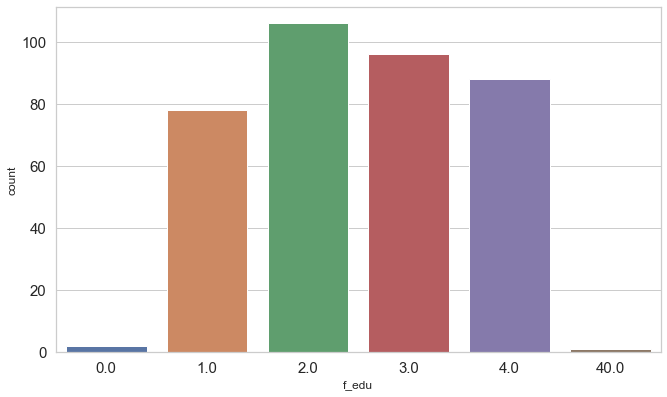

In [56]:
countplot(data.f_edu)

> * Most fathers studied only 5-9 years at school
> * There an unrealistic value

In [57]:
data.loc[data.f_edu == 40]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time_2,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
11,GP,F,15,R,GT3,T,2.0,40.0,services,other,...,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [58]:

print(f"Median father's education: {data.loc[data.f_edu != 40].f_edu.median()}")

Median father's education: 2.0


Let's substitute this value (40) with median and fill missing values with backfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


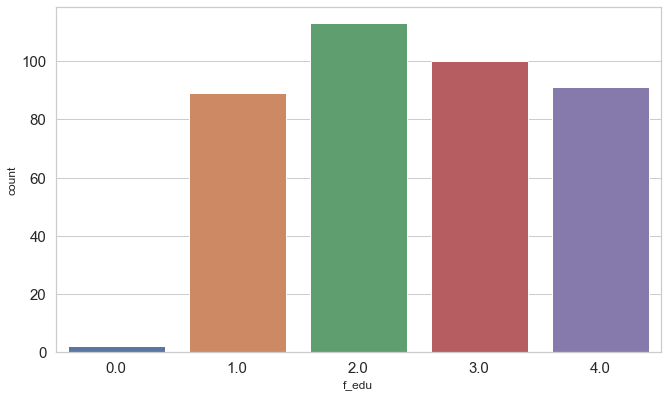

In [59]:
data.f_edu = data.f_edu.apply(lambda x: data.loc[data.f_edu != 40].f_edu.median() if x == 40 else x)
data.f_edu.fillna(method='bfill', inplace=True)
countplot(data.f_edu)
data.loc[:, ['f_edu']].info()

### Mother's job

In [60]:
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [61]:
data.m_job = data.m_job.apply(nan_killer)
data.m_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

In [62]:
data.loc[:, ['m_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


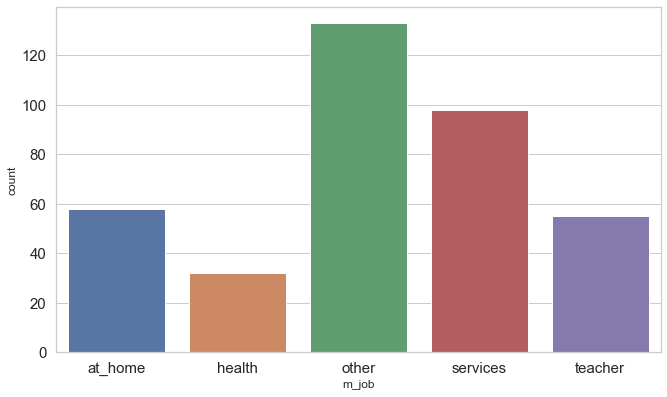

In [63]:
countplot(data.m_job)

> * Most mothers work in some unknown (others) spheres and in services
> * The same number of mothers work at home and as teachers

Let's fill missing values using backfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


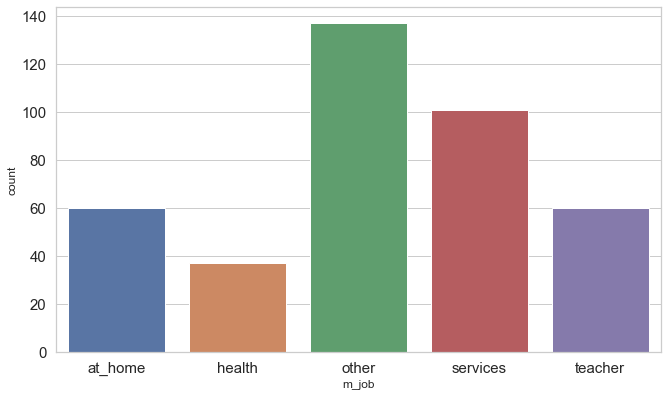

In [64]:
data.m_job.fillna(method='bfill', inplace=True)
data.loc[:, ['m_job']].info()
countplot(data.m_job)

### Father's job

In [65]:
data.f_job.unique()

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [66]:
data.f_job = data.f_job.apply(nan_killer)
data.f_job.unique()

array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

In [67]:
data.loc[:, ['f_job']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


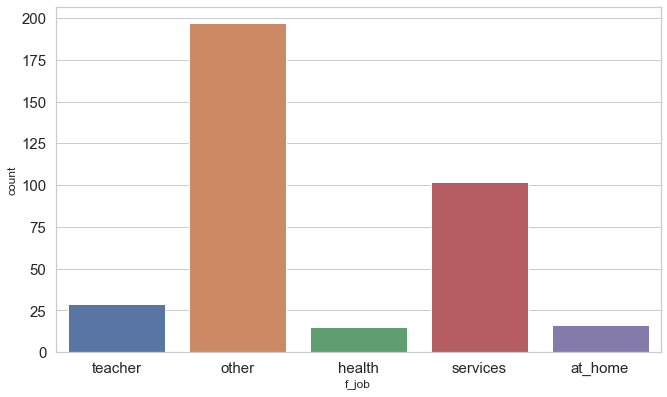

In [68]:
countplot(data.f_job)

> * The similar situation is for fathers' most popular job spheres
> * Fathers' job distribution is more uneven than mothers'

Let's fill missing values using backfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


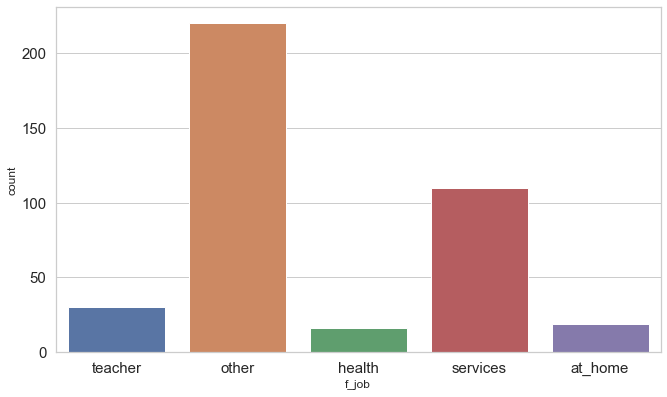

In [69]:
data.f_job.fillna(method='bfill', inplace=True)
data.loc[:, ['f_job']].info()
countplot(data.f_job)

### Reason for choosing a school

In [70]:
data.reason.unique()

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [71]:
data.reason = data.reason.apply(nan_killer)
data.reason.unique()

array(['course', 'other', 'home', 'reputation', None], dtype=object)

In [72]:
data.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


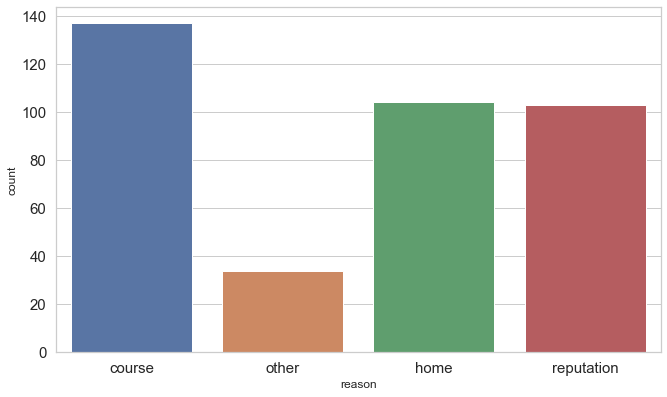

In [73]:
countplot(data.reason)

> * The educational course was the most popular reason for choosing a school
> * Similar amount of people chose home (distance from school) and reputation of school

Let's fill missing values using forwardfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


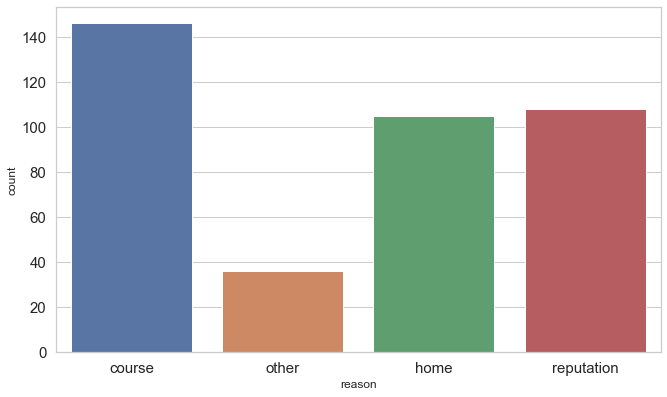

In [74]:
data.reason.fillna(method='ffill', inplace=True)
data.loc[:, ['reason']].info()
countplot(data.reason)

### Guardian (who takes care of a student)

In [75]:
data.guardian.unique()

array(['mother', 'father', 'other', nan], dtype=object)

In [76]:
data.guardian = data.guardian.apply(nan_killer)
data.guardian.unique()

array(['mother', 'father', 'other', None], dtype=object)

In [77]:
data.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


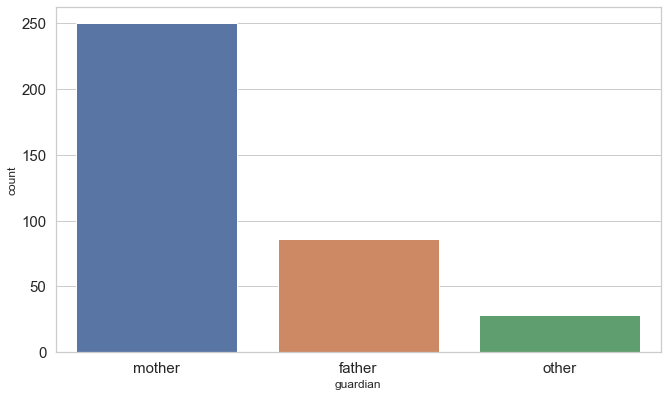

In [78]:
countplot(data.guardian)

> Usually a mother is who takes care of a student (more than 2 times more frequently than fathers)

Let's fill missing values using forwardfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


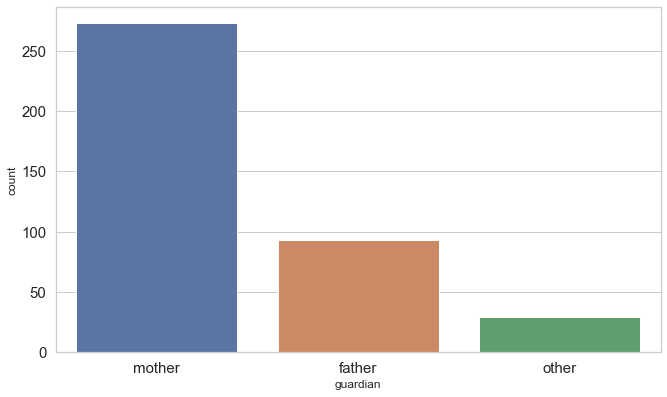

In [79]:
data.guardian.fillna(method='ffill', inplace=True)
data.loc[:, ['guardian']].info()
countplot(data.guardian)

### Travel time


In [80]:
data.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [81]:
data.travel_time = data.travel_time.apply(nan_killer)
data.travel_time.unique()

array([ 2.,  1.,  3., nan,  4.])

In [82]:
data.loc[:, ['travel_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


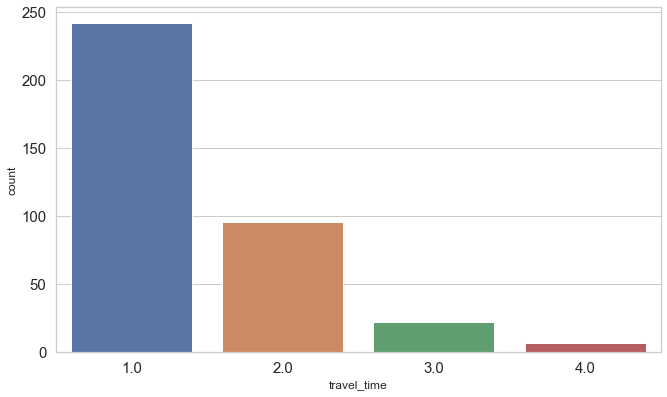

In [83]:
countplot(data.travel_time)

> * Most students live near the school and spend less than 15 minutes to reach it
> * Nevertheless, there are also a few people who spend more than an hour

In [84]:
data.loc[data.travel_time == 4]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,study_time_2,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
61,GP,F,16,R,GT3,T,1.0,1.0,services,services,...,-3.0,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
108,GP,M,15,R,GT3,T,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
149,GP,M,15,R,LE3,T,2.0,1.0,services,other,...,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,...,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
228,GP,M,18,R,GT3,T,2.0,1.0,at_home,other,...,-6.0,yes,yes,yes,4.0,3.0,2.0,3.0,14.0,45.0
327,GP,M,17,R,GT3,T,2.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,5.0,4.0,8.0,50.0
375,MS,F,18,R,GT3,T,1.0,1.0,other,other,...,-9.0,yes,yes,no,4.0,3.0,2.0,4.0,2.0,50.0


In [85]:
print(f"Median travel time: {data.travel_time.median()}")

Median travel time: 1.0


Let's fill missing values using forward fill method:

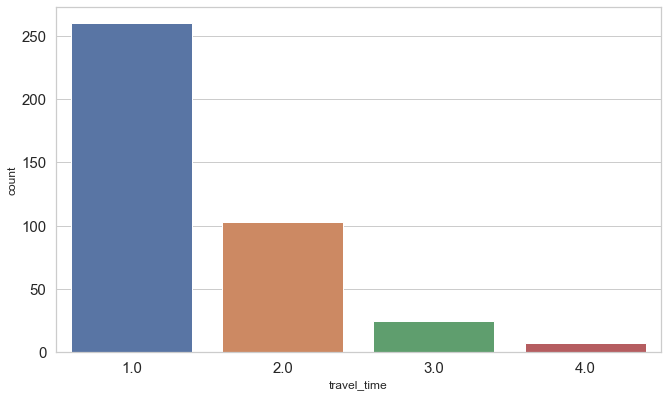

In [86]:
data.travel_time.fillna(method='ffill', inplace=True)
countplot(data.travel_time)

### Study time (per week)

In [87]:
display(data.study_time.unique())
display(data.study_time_2.unique())

array([ 2.,  3.,  1., nan,  4.])

array([ -6.,  -9.,  -3.,  nan, -12.])

In [88]:
data.study_time = data.study_time.apply(nan_killer)
data.study_time.unique()

array([ 2.,  3.,  1., nan,  4.])

> * The second column with study time contains unrealistic values
> * It is sensible to drop this column

In [89]:
data.drop(labels=['study_time_2'], inplace=True, axis=1)

In [90]:
data.loc[:, ['study_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


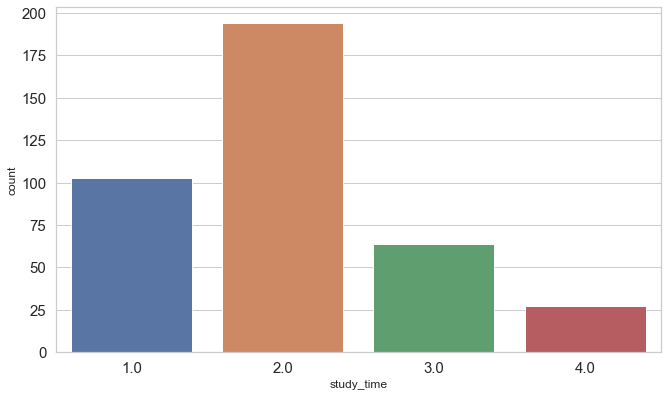

In [91]:
countplot(data.study_time)

In [92]:
data.loc[data.study_time == 4]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
47,GP,M,16,U,GT3,T,4.0,3.0,health,other,...,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,...,no,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
67,GP,F,16,U,GT3,A,3.0,2.0,services,other,...,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
69,GP,F,15,U,LE3,T,3.0,1.0,other,other,...,no,yes,yes,no,4.0,4.0,2.0,3.0,12.0,80.0
70,GP,M,16,R,GT3,T,3.0,1.0,other,other,...,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
71,GP,M,15,U,GT3,T,4.0,2.0,other,other,...,yes,yes,yes,no,3.0,3.0,3.0,3.0,0.0,50.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,...,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,...,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
95,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0


In [93]:
print(f"Median study time: {data.study_time.median()}")

Median study time: 2.0


> The are 27 students (outliers) who study more than 10 hours per week


Let's fill missing values with median:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_time  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


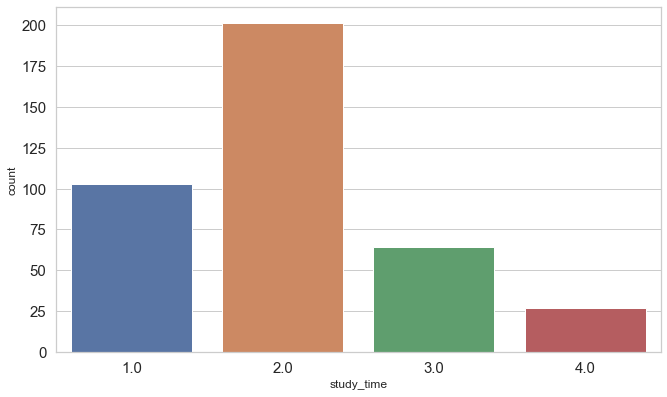

In [94]:
data.study_time.fillna(value=data.study_time.median(), inplace=True)
countplot(data.study_time)
data.loc[:, ['study_time']].info()

### Failures

In [95]:
data.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [96]:
data.failures = data.failures.apply(nan_killer)
data.failures.unique()

array([ 0.,  3., nan,  2.,  1.])

In [97]:
data.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


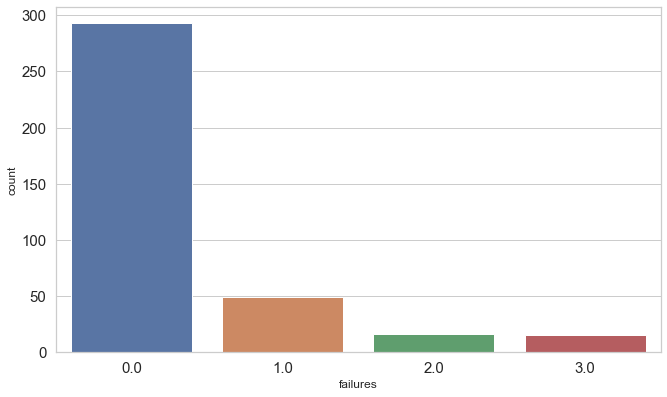

In [98]:
countplot(data.failures)

In [99]:
data.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

> * Most students have no failures

Let's fill missing values using forwardfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


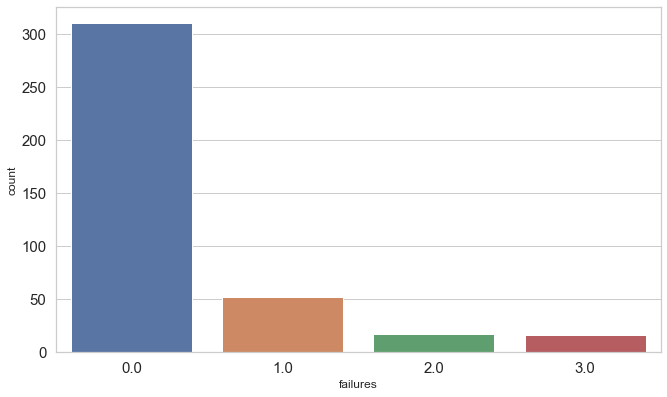

In [100]:
data.failures.fillna(method='ffill', inplace=True)
data.loc[:, ['failures']].info()
countplot(data.failures)

### School support


In [101]:
data.school_sup.unique()

array(['yes', 'no', nan], dtype=object)

In [102]:
data.school_sup = data.school_sup.apply(nan_killer)
data.school_sup.unique()

array(['yes', 'no', None], dtype=object)

In [103]:
data.loc[:, ['school_sup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


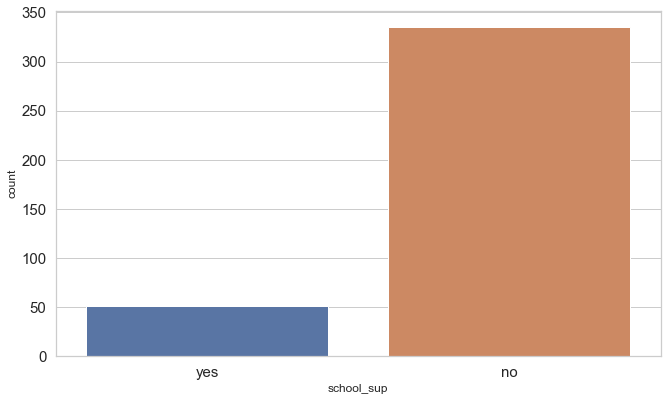

In [104]:
countplot(data.school_sup)

> Most students have no extra school support

Let's fill missing values using forwardfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


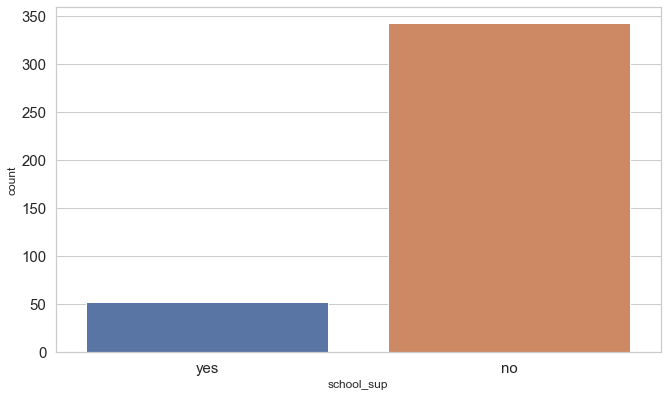

In [105]:
data.school_sup.fillna(method='ffill', inplace=True)
data.loc[:, ['school_sup']].info()
countplot(data.school_sup)

### Family support

In [106]:
data.fam_sup.unique()

array(['no', 'yes', nan], dtype=object)

In [107]:
data.fam_sup = data.fam_sup.apply(nan_killer)
data.fam_sup.unique()

array(['no', 'yes', None], dtype=object)

In [108]:
data.loc[:, ['fam_sup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


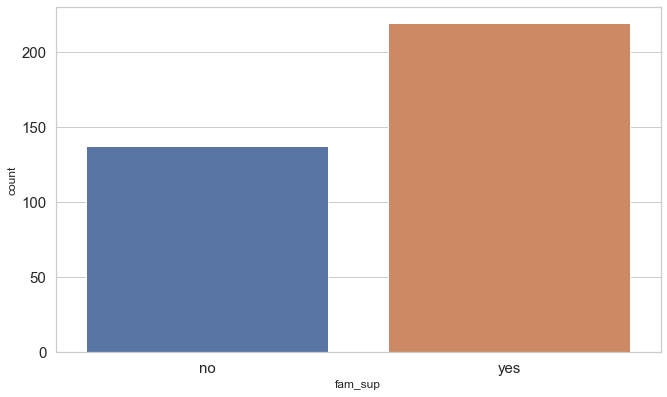

In [109]:
countplot(data.fam_sup)

> Most students receive family educational support



Let's fill missing values using forwardfill method:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


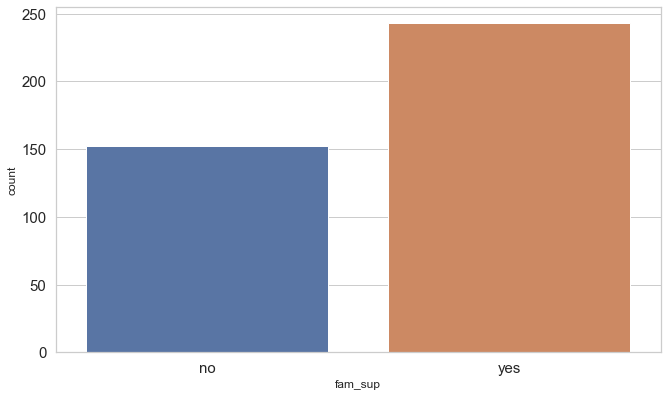

In [110]:
data.fam_sup.fillna(method='ffill', inplace=True)
data.loc[:, ['fam_sup']].info()
countplot(data.fam_sup)

### Extra (paid) math lessons

In [111]:
data.paid.unique()

array(['no', nan, 'yes'], dtype=object)

In [112]:
data.paid = data.paid.apply(nan_killer)
data.paid.unique()

array(['no', None, 'yes'], dtype=object)

In [113]:
data.loc[:, ['paid']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


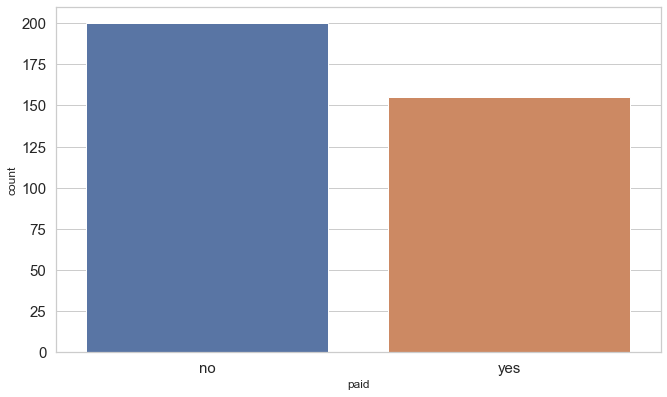

In [114]:
countplot(data.paid)

> Most students don't have extra math lessons



Let's fill missing values using forwardfill method:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


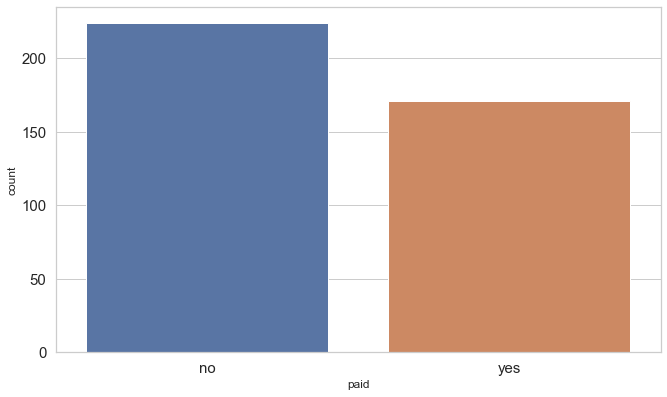

In [115]:
data.paid.fillna(method='ffill', inplace=True)
data.loc[:, ['paid']].info()
countplot(data.paid)

### Extracurricular activities

In [116]:
data.activities.unique()

array(['no', 'yes', nan], dtype=object)

In [117]:
data.activities = data.activities.apply(nan_killer)
data.activities.unique()

array(['no', 'yes', None], dtype=object)

In [118]:
data.loc[:, ['activities']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


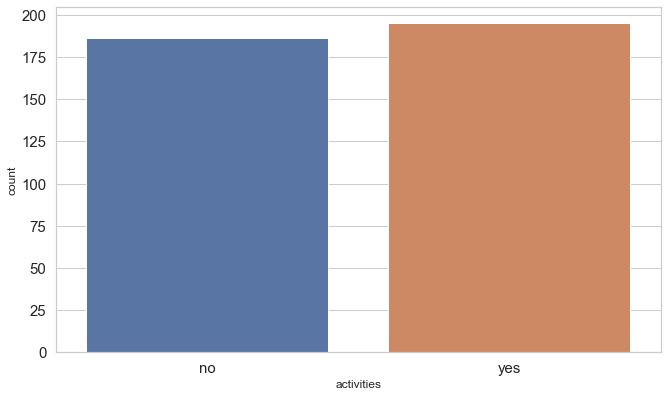

In [119]:
countplot(data.activities)

> Almost equal parts of students have and don't have extracurricular activities



Let's fill missing values using forwardfill method:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


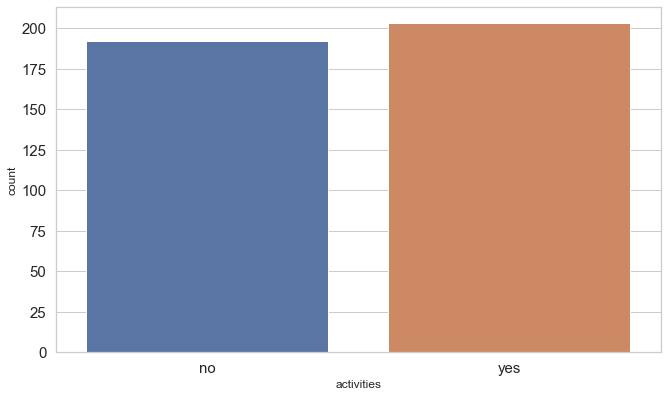

In [120]:
data.activities.fillna(method='ffill', inplace=True)
data.loc[:, ['activities']].info()
countplot(data.activities)

### Nursery

In [121]:
data.nursery.unique()

array(['yes', 'no', nan], dtype=object)

In [122]:
data.nursery = data.nursery.apply(nan_killer)
data.nursery.unique()

array(['yes', 'no', None], dtype=object)

In [123]:
data.loc[:, ['nursery']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


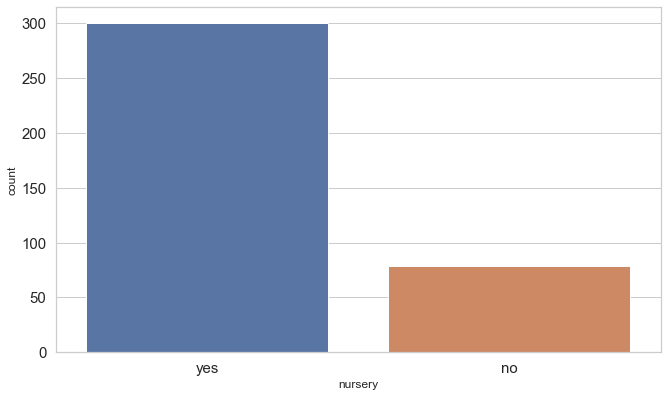

In [124]:
countplot(data.nursery)

> Most children visited a nursery school

Let's fill missing values using forwardfill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


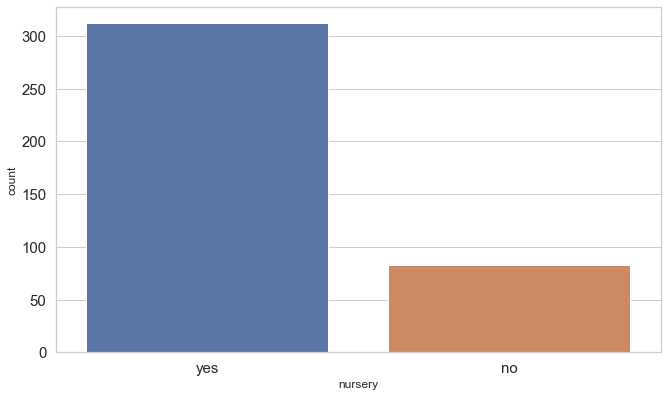

In [125]:
data.nursery.fillna(method='ffill', inplace=True)
data.loc[:, ['nursery']].info()
countplot(data.nursery)

### Desire to obtain higher education

In [126]:
data.higher.unique()

array(['yes', nan, 'no'], dtype=object)

In [127]:
data.higher = data.higher.apply(nan_killer)
data.higher.unique()

array(['yes', None, 'no'], dtype=object)

In [128]:
data.loc[:, ['higher']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


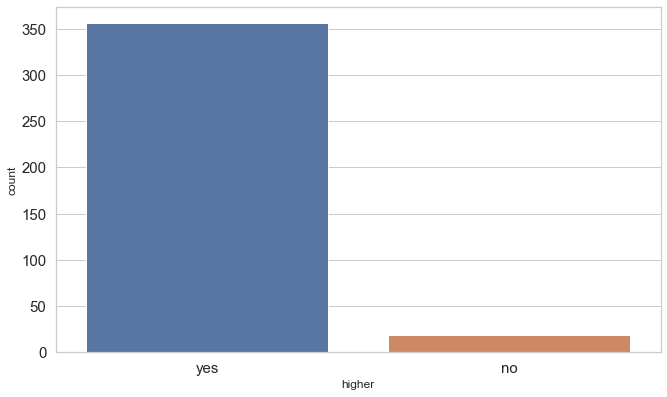

In [129]:
countplot(data.higher)

> Most students would like to get higher education



Let's fill missing values using forward fill method:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


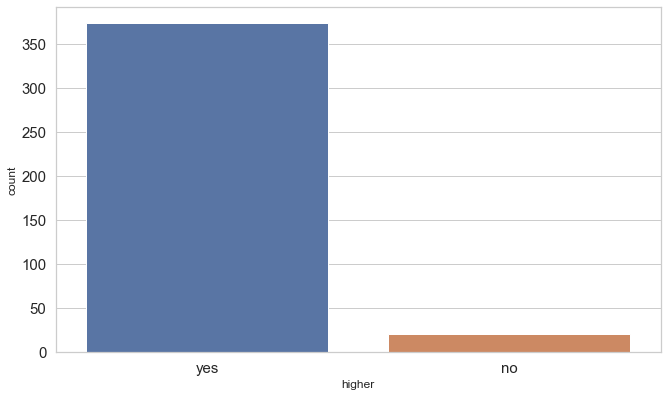

In [130]:
data.higher.fillna(method='ffill', inplace=True)
data.loc[:, ['higher']].info()
countplot(data.higher)

### Internet access at home

In [131]:
data.internet.unique()

array([nan, 'yes', 'no'], dtype=object)

In [132]:
data.internet = data.internet.apply(nan_killer)
data.internet.unique()

array([None, 'yes', 'no'], dtype=object)

In [133]:
data.loc[:, ['internet']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


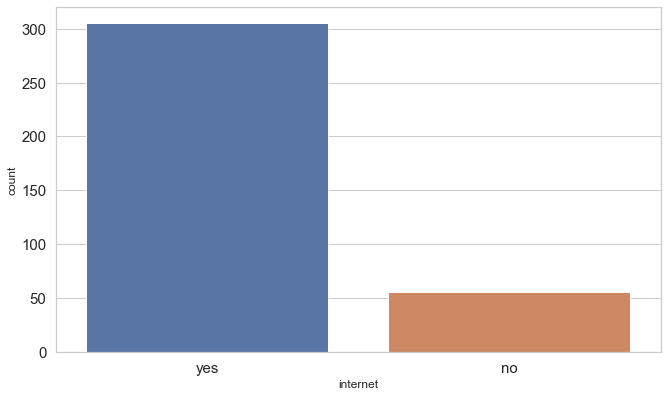

In [134]:
countplot(data.internet)

> Most students have internet access



Let's fill missing values using back fill method:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


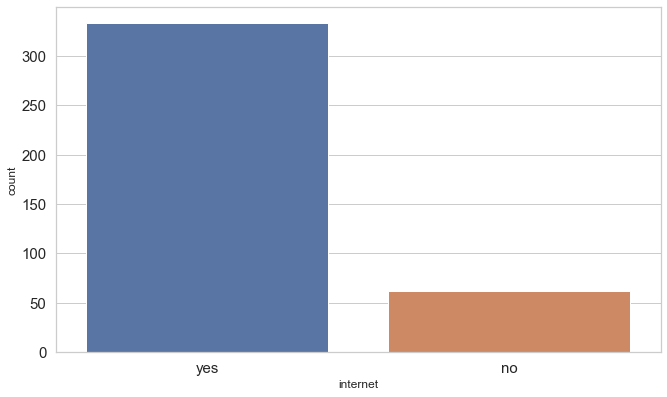

In [135]:
data.internet.fillna(method='bfill', inplace=True)
data.loc[:, ['internet']].info()
countplot(data.internet)

### Romantic relationships

In [136]:
data.romantic.unique()

array(['no', nan, 'yes'], dtype=object)

In [137]:
data.romantic = data.romantic.apply(nan_killer)
data.romantic.unique()

array(['no', None, 'yes'], dtype=object)

In [138]:
data.loc[:, ['romantic']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


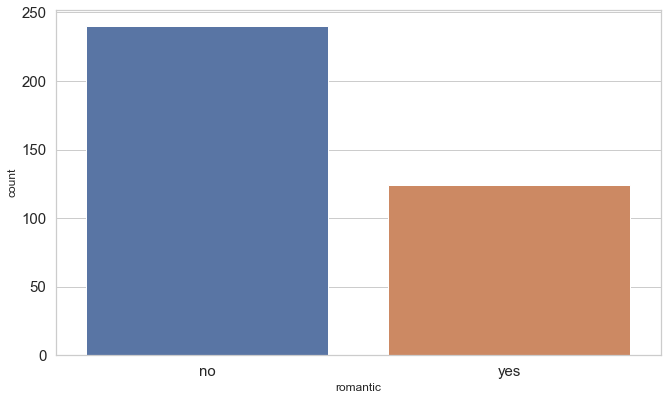

In [139]:
countplot(data.romantic)

> Most students are not in romantic relationships

Let's fill missing values using forward fill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


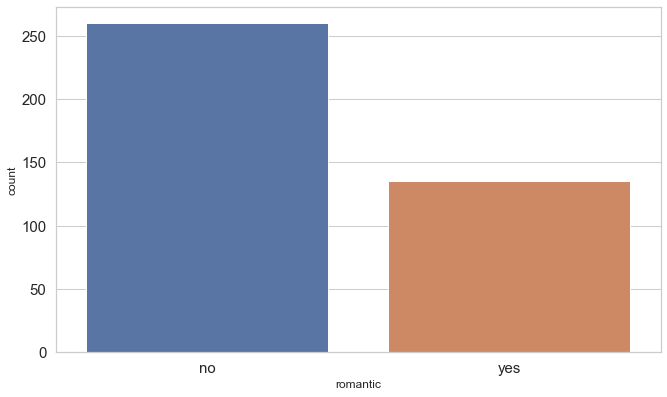

In [140]:
data.romantic.fillna(method='ffill', inplace=True)
data.loc[:, ['romantic']].info()
countplot(data.romantic)

### Family relationships

In [141]:
data.fam_rel.unique()

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

We can see that there are values which cannot be explained, so it is essential to get rid of them:

In [142]:
data.fam_rel = data.fam_rel.apply(lambda x: None if x == -1 else x)
data.fam_rel = data.fam_rel.apply(nan_killer)
data.fam_rel.unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

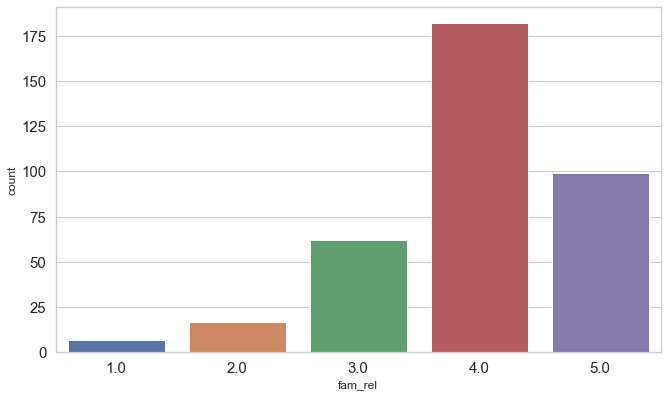

In [143]:
countplot(data.fam_rel)

> Most students have adequate relations with parents

In [144]:
data.loc[:, ['fam_rel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Let's fill missing values using forward fill method:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


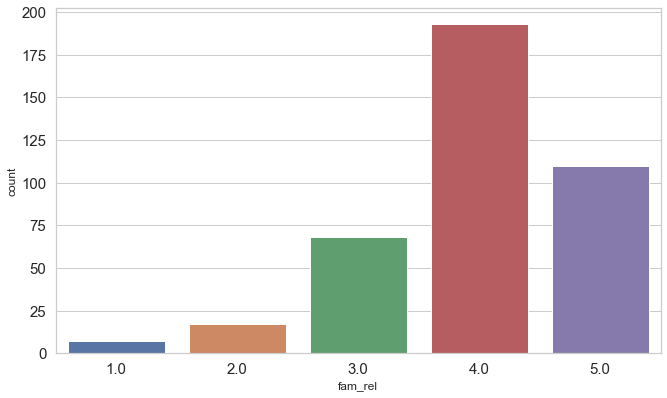

In [145]:
data.fam_rel.fillna(method='ffill', inplace=True)
data.loc[:, ['fam_rel']].info()
countplot(data.fam_rel)

### Free time

In [146]:
data.free_time.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [147]:
data.free_time = data.free_time.apply(nan_killer)
data.free_time.unique()

array([ 3.,  2.,  4.,  1.,  5., nan])

In [148]:
data.loc[:, ['free_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


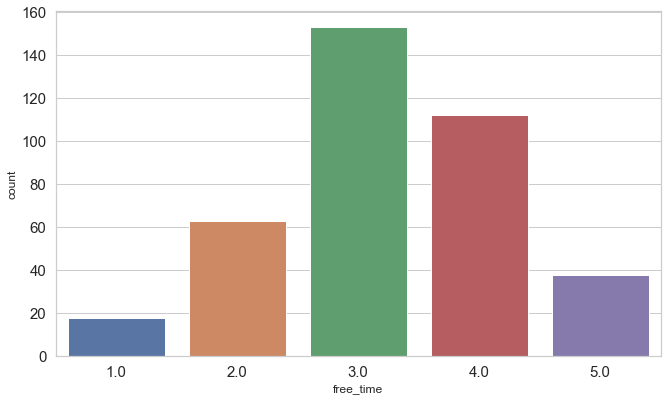

In [149]:
countplot(data.free_time)

In [150]:
data.loc[data.free_time == 1]

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,...,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,other,...,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,...,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
95,GP,F,15,U,GT3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,3.0,1.0,2.0,1.0,2.0,50.0
106,GP,F,15,U,GT3,T,2.0,2.0,other,other,...,yes,yes,yes,no,5.0,1.0,2.0,3.0,8.0,40.0
111,GP,F,16,U,GT3,T,3.0,3.0,services,other,...,yes,yes,yes,no,4.0,1.0,2.0,2.0,0.0,50.0
112,GP,F,16,R,GT3,T,2.0,2.0,at_home,other,...,yes,yes,yes,no,3.0,1.0,2.0,5.0,6.0,65.0
168,GP,F,16,U,GT3,T,2.0,2.0,other,other,...,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
189,GP,M,17,U,GT3,T,1.0,2.0,at_home,other,...,yes,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0


In [151]:
print(f'Median free time: {data.free_time.median()}')

Median free time: 3.0


Let's fill missing values with median:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


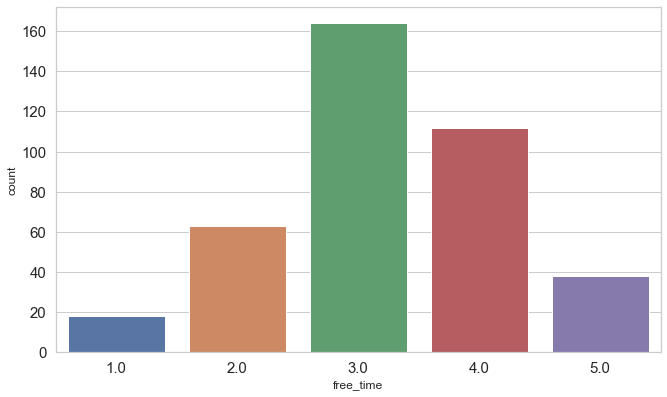

In [152]:
data.free_time.fillna(value=data.free_time.median(), inplace=True)
data.loc[:, ['free_time']].info()
countplot(data.free_time)

### Going out

In [153]:
data.go_out.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [154]:
data.go_out = data.go_out.apply(nan_killer)
data.go_out.unique()

array([ 4.,  3.,  2.,  1.,  5., nan])

In [155]:
data.loc[:, ['go_out']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


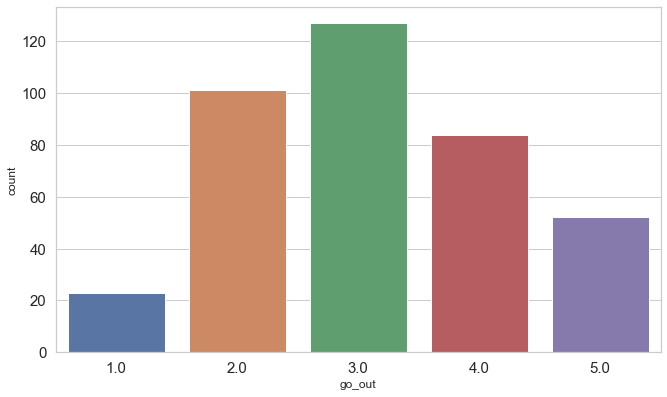

In [156]:
countplot(data.go_out)

Let's fill missing values with median: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


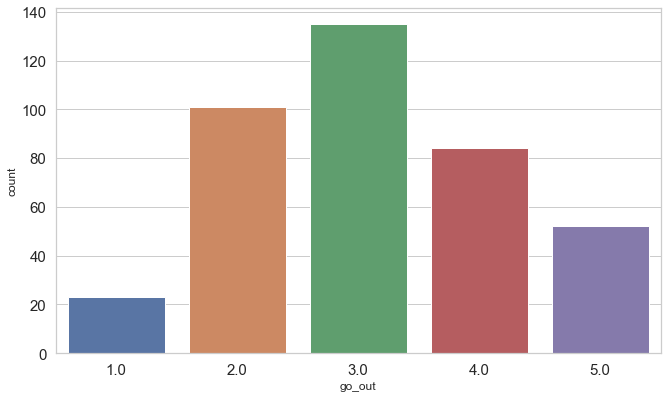

In [157]:
data.go_out.fillna(value=data.go_out.median(), inplace=True)
data.loc[:, ['go_out']].info()
countplot(data.go_out)

### Health

In [158]:
data.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [159]:
data.health = data.health.apply(nan_killer)
data.health.unique()

array([ 3.,  5.,  1.,  2.,  4., nan])

In [160]:
data.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


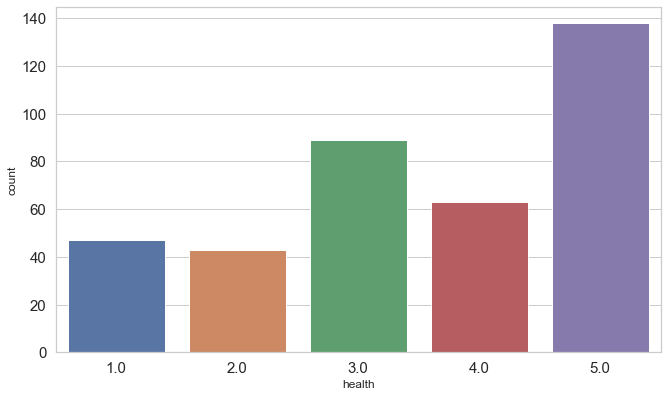

In [161]:
countplot(data.health)

> In average, students have good health

Let's fill missing values with median:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


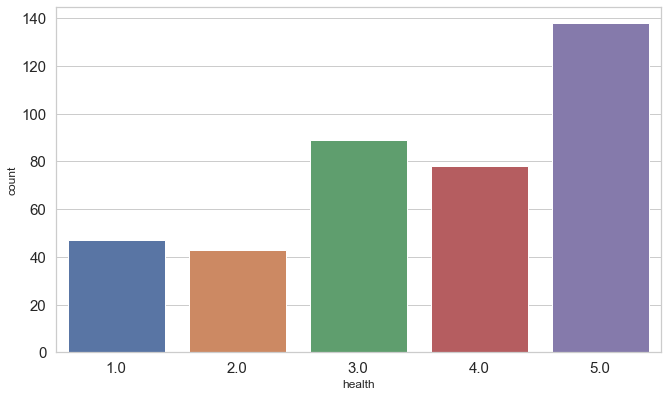

In [162]:
data.health.fillna(value=data.health.median(), inplace=True)
data.loc[:, ['health']].info()
countplot(data.health)

### Absences

In [163]:
data.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [164]:
data.absences = data.absences.apply(nan_killer)
data.absences.unique()

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [165]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


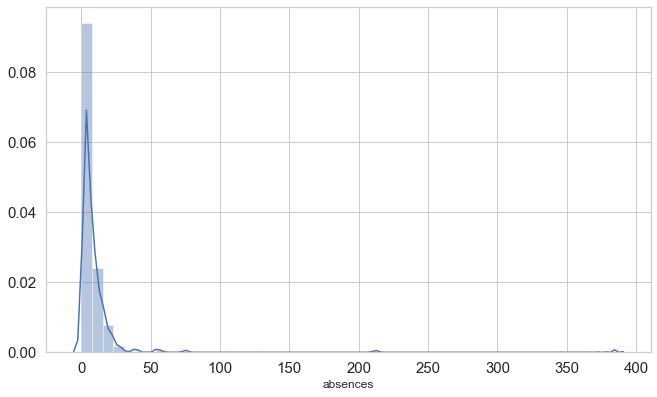

In [166]:
distplot(data.absences, bins=50)

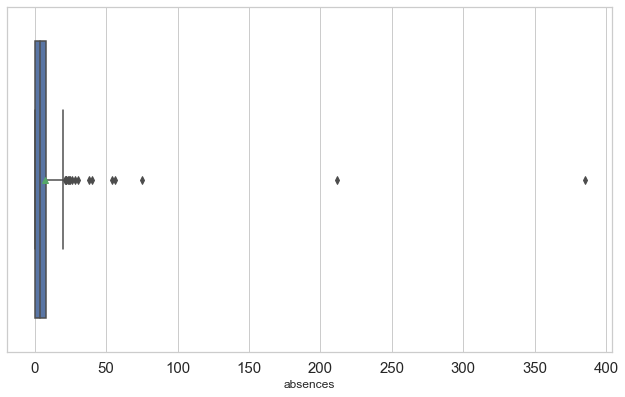

In [167]:
boxplot(data.absences)

> * Lots of outliers
> * It is sensible to omit some of them

In [168]:
print(f'Mean amount of absences: {data.absences.mean()}')
print(f'Median amount of absences: {data.absences.median()}')

Mean amount of absences: 7.2793733681462145
Median amount of absences: 4.0


Let's substitute nan-values and biggest outliers with median:

In [169]:
data.absences = data.absences.apply(lambda x: data.absences.median() if pd.isnull(x) or x >= 40 else x)
data.absences.unique()

array([ 6.,  4., 10.,  2.,  0., 16., 14.,  7.,  8., 25., 12., 18., 26.,
       20., 24., 28.,  5., 13., 15., 22.,  3., 21.,  1., 30., 19.,  9.,
       11., 38., 23., 17.])

Let's take a look at absences after correction:

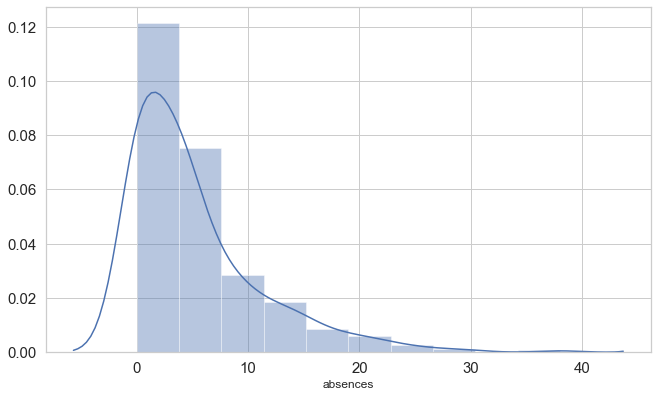

In [170]:
distplot(data.absences)

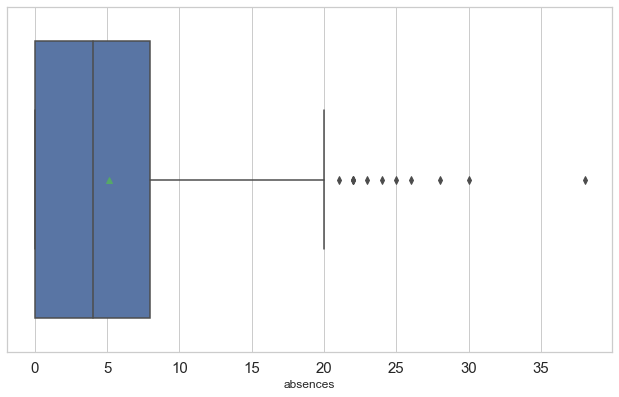

In [171]:
boxplot(data.absences)

In [172]:
print(f'Mean amount of absences: {data.absences.mean()}')
print(f'Median amount of absences: {data.absences.median()}')

Mean amount of absences: 5.159493670886076
Median amount of absences: 4.0


In [173]:
data.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


> * So the missing values are filled and the most considerable outliers are executed

### *Math score (!)*

In [174]:
data.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [175]:
data.score = data.score.apply(nan_killer)
data.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [176]:
data.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [177]:
data.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

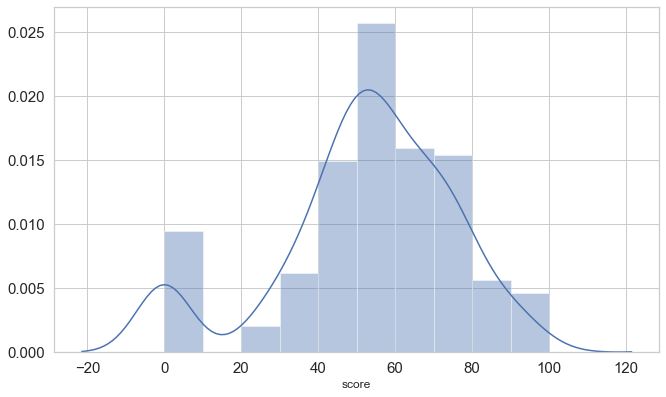

In [178]:
distplot(data.score, bins=10)

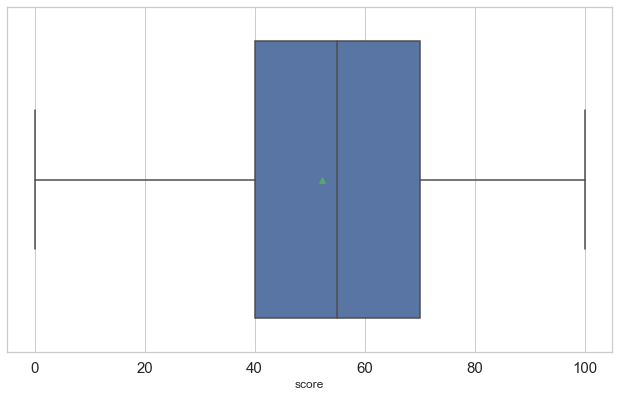

In [179]:
boxplot(data.score)

In [180]:
print(f'Mean math score: {data.score.mean()}')
print(f'Median math score: {data.score.median()}')

Mean math score: 52.26221079691517
Median math score: 55.0


> * No outliers
> * Quite a normal distribution
> * 6 missing values

Let's fill missing values with mean:

In [181]:
data.score.fillna(value=data.score.mean(), inplace=True)
data.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Let's check the distribution of math score now:

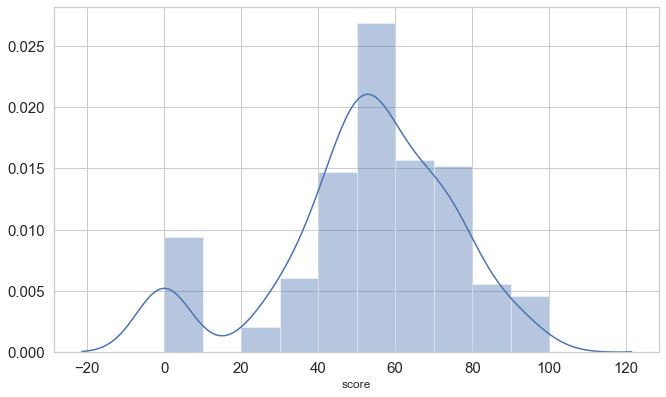

In [182]:
distplot(data.score, bins=10)

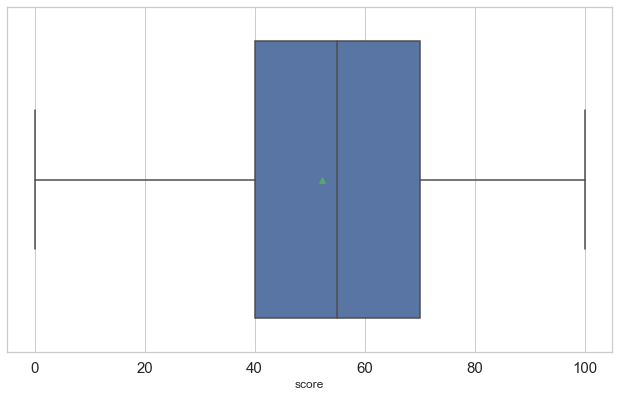

In [183]:
boxplot(data.score)

> * All missing values are filled
> * The distribution hasn't changed significantly
> * It is suspicious that lots of students have 0 scores for math exam

In [184]:
data

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,yes,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,A,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,yes,yes,no,no,5.0,5.0,4.0,4.0,4.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,U,GT3,T,1.0,1.0,other,other,...,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# Correlation analysis

> It is necessary to consider all rank features as categorial:

In [185]:
rank_columns = ['m_edu', 'f_edu', 'travel_time', 'study_time',
                'failures', 'fam_rel', 'free_time', 'go_out', 'health']

for column in rank_columns:
    data[column] = data[column].astype('category')

First of all, it is essential to take into account that there are lots of students with 0 math score which seems quite strange since in real world this situation is very unlikely to happen. 

That is why it makes sense to create a new dataset which doesn't contain any zero values. After that we can conduct more objective correlation analysis.

## Numeric features

At first, let's drop zero values and analyse the following data:

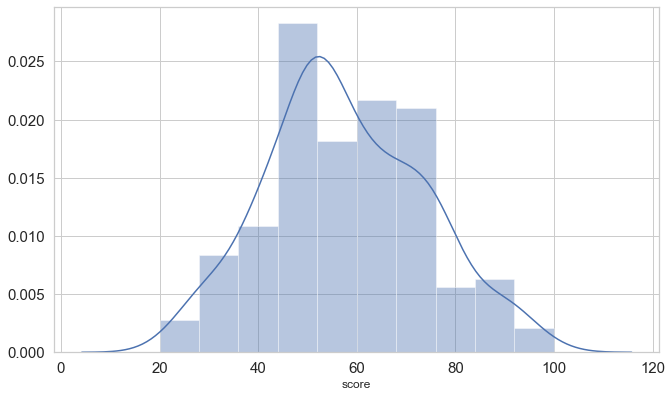

In [186]:
new_data = data.loc[data.score > 0]
distplot(new_data.score)

> After deleting zero values the distribution of math exam score became normal

In [187]:
corr = new_data.corr().loc[:, ['score']]
corr

,score
age,-0.135849
absences,-0.227528
score,1.000000


**It is better to check the significance of this coefficients because they are not really big at first sight:**

H0: corr = 0

Ha: corr != 0

In [199]:
for column in ['age', 'absences']:
    print(f'Correlation coefficient for {column}: {scipy.stats.pearsonr(new_data.score, new_data[column])[0]}')
    print(f'P-value for {column}: {scipy.stats.pearsonr(new_data.score, new_data[column])[1]}')
    print(f'Alpha: {0.05}', end='\n\n')

Correlation coefficient for age: -0.1358490485570441
P-value for age: 0.010072354320585968
Alpha: 0.05

Correlation coefficient for absences: -0.22752828491307653
P-value for absences: 1.3793018448095255e-05
Alpha: 0.05



> * Both p-values are lower than alpha, so we have enough reasons to reject H0
> * Correlation coefficients are significant enough

In [200]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   school       358 non-null    object  
 1   sex          358 non-null    object  
 2   age          358 non-null    int64   
 3   address      358 non-null    object  
 4   fam_size     358 non-null    object  
 5   p_status     358 non-null    object  
 6   m_edu        358 non-null    category
 7   f_edu        358 non-null    category
 8   m_job        358 non-null    object  
 9   f_job        358 non-null    object  
 10  reason       358 non-null    object  
 11  guardian     358 non-null    object  
 12  travel_time  358 non-null    category
 13  study_time   358 non-null    category
 14  failures     358 non-null    category
 15  school_sup   358 non-null    object  
 16  fam_sup      358 non-null    object  
 17  paid         358 non-null    object  
 18  activities   358 non-null    o

## Categorial features

In [190]:
def box(column):
    fig, axes = plt.subplots(figsize=(12, 6))
    sns.boxplot(new_data[column], new_data['score'])
    plt.xticks(size=15)
    plt.yticks(size=15)
    axes.set_title(f'Boxplot for {column}', size=20)
    plt.show()

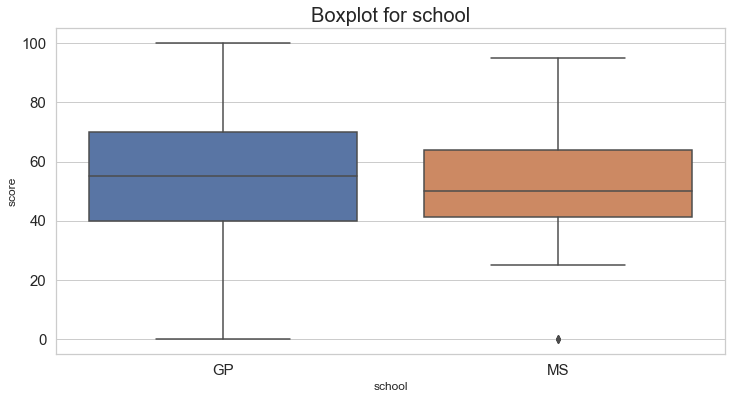

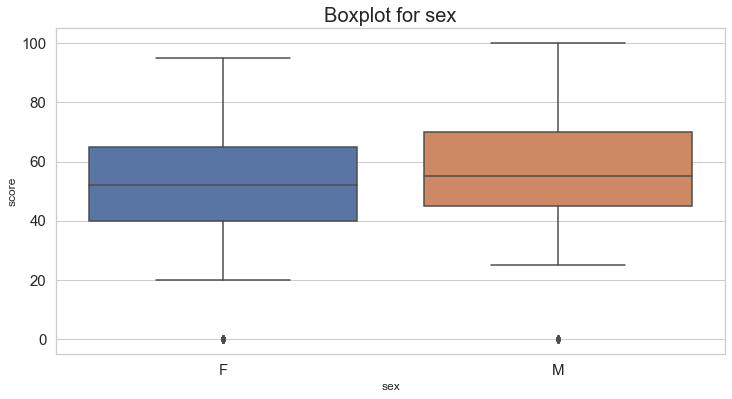

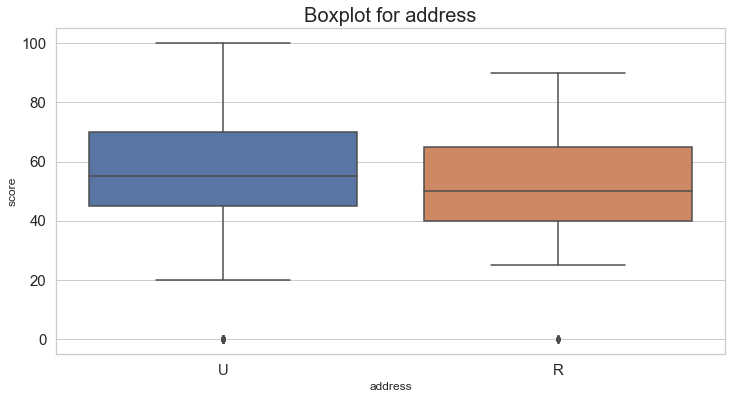

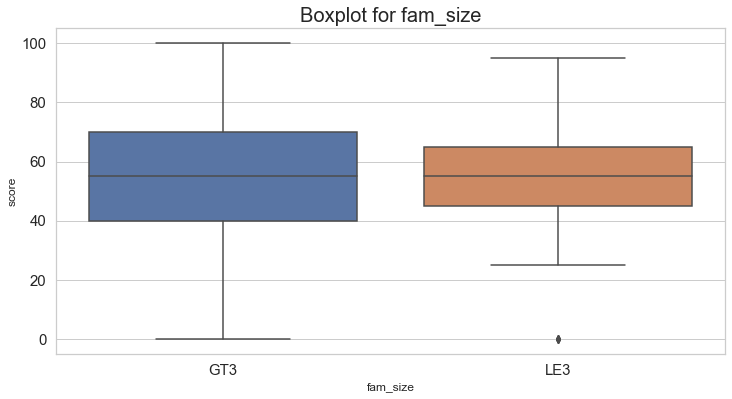

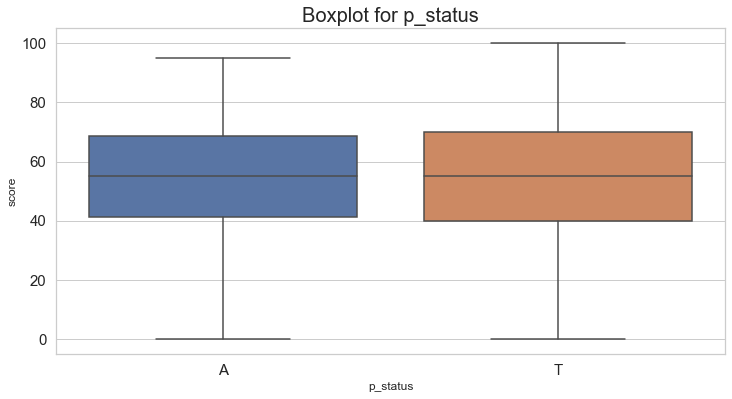

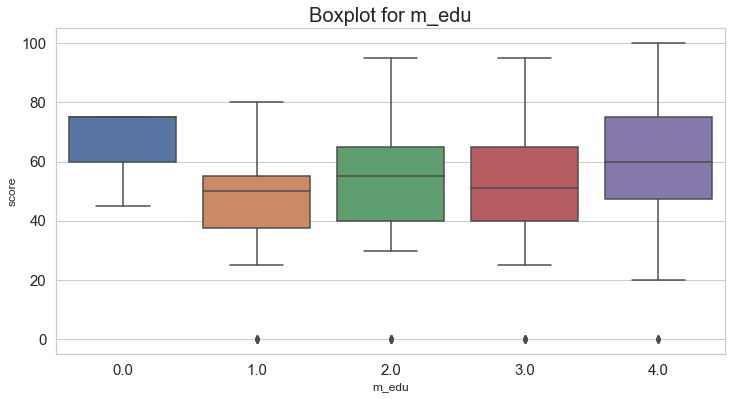

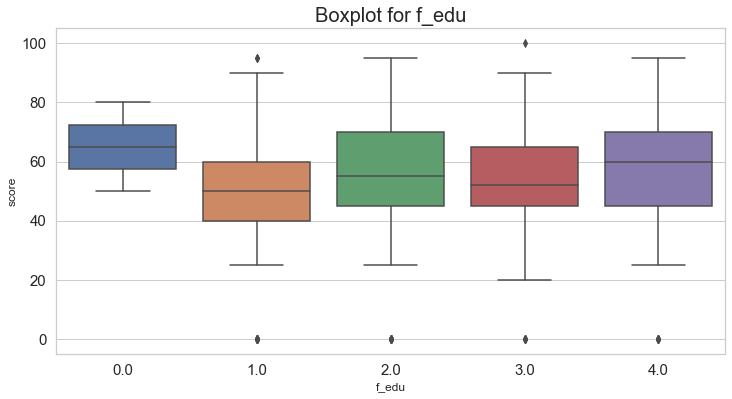

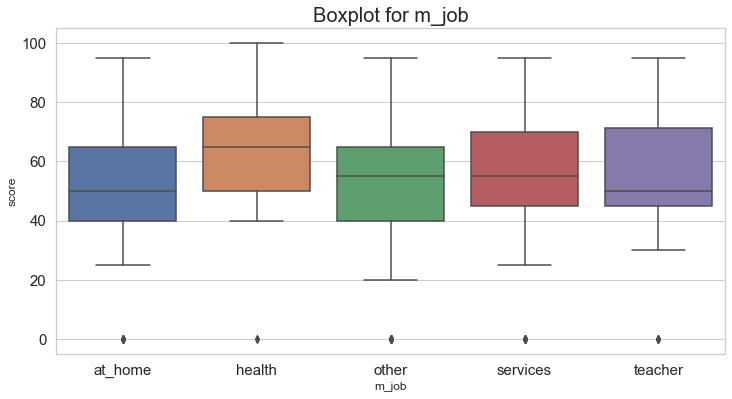

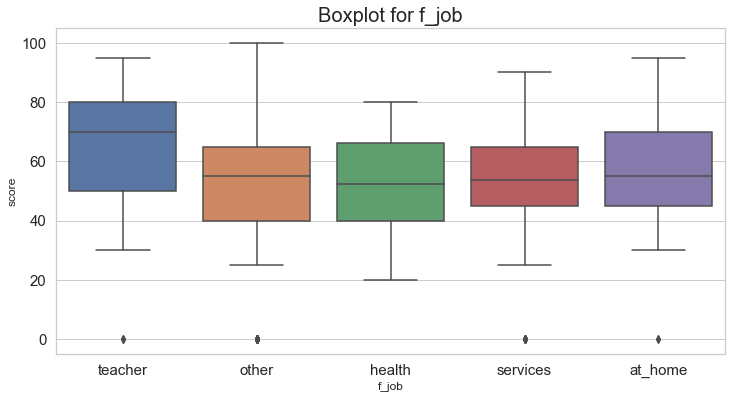

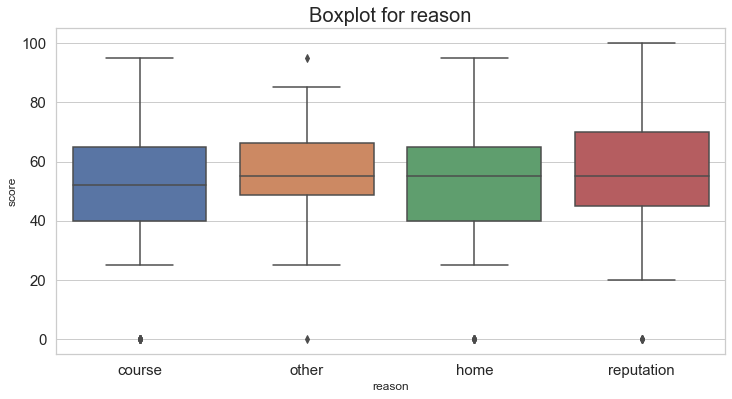

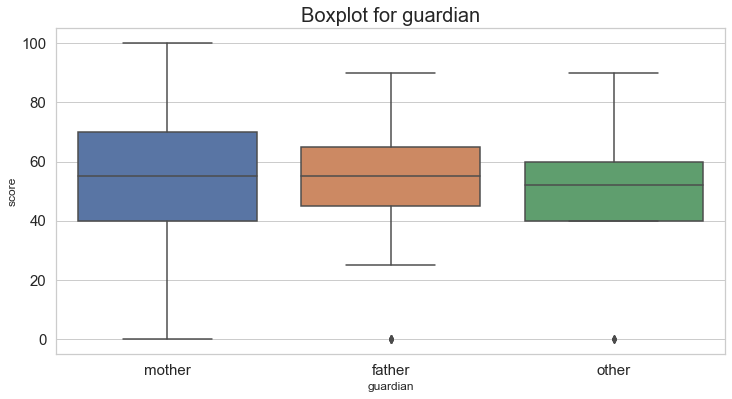

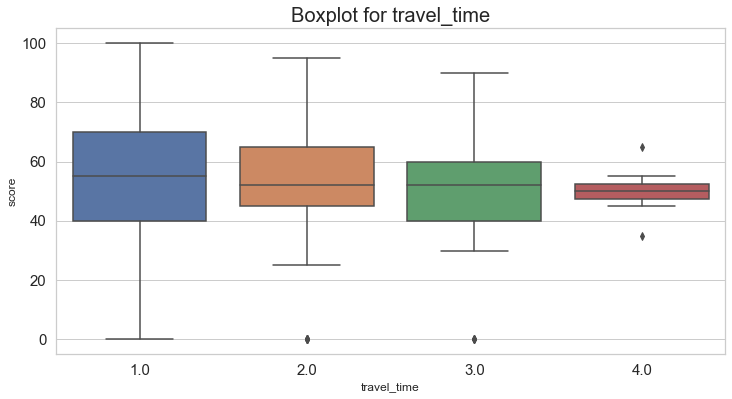

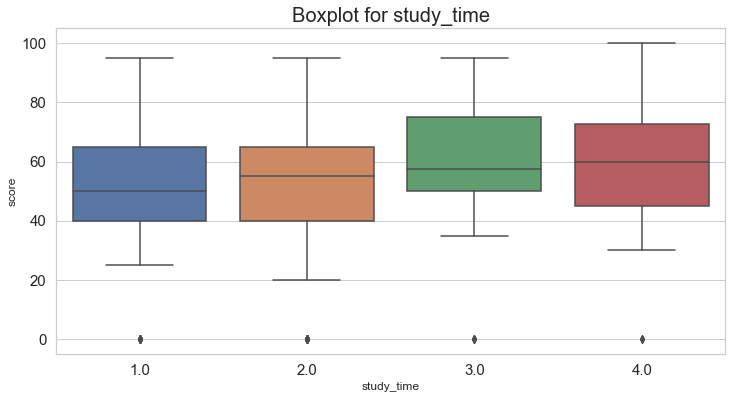

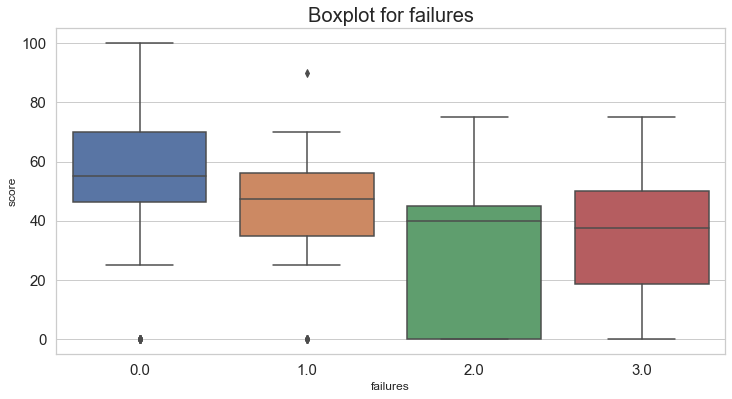

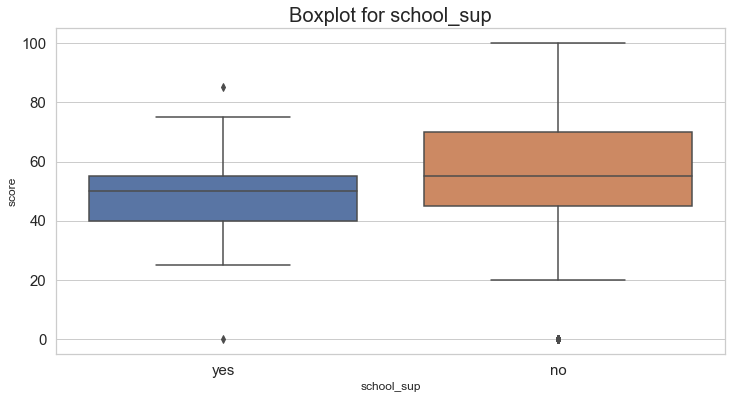

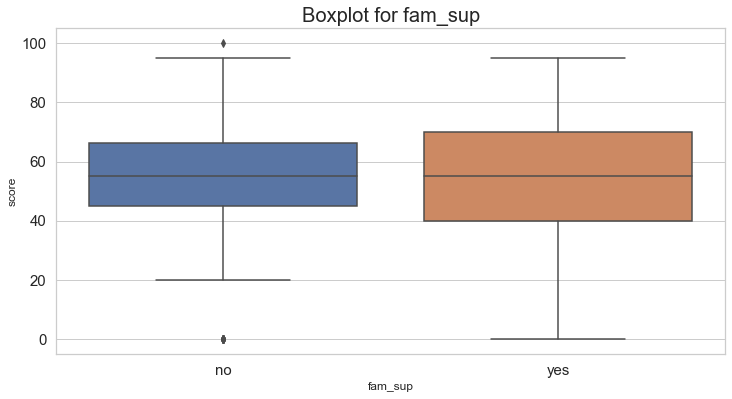

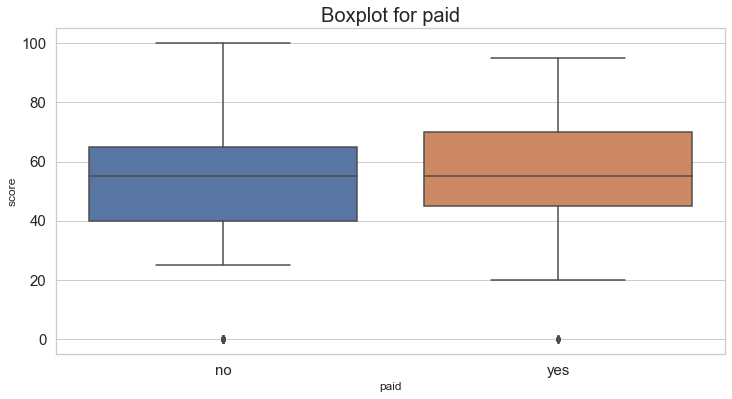

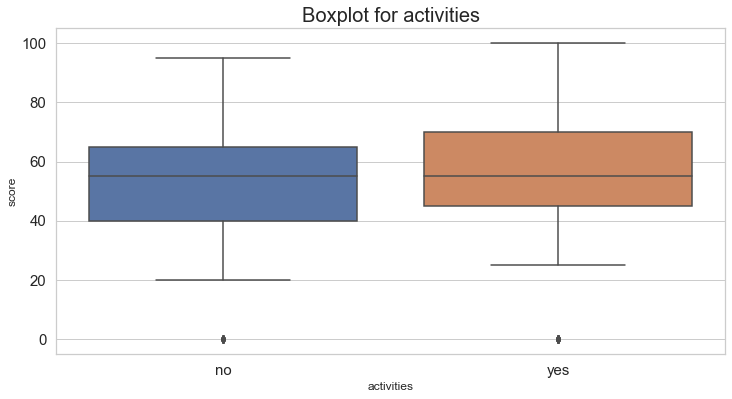

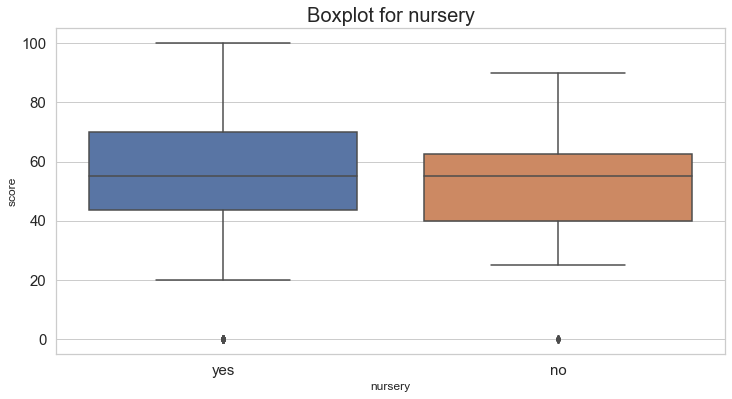

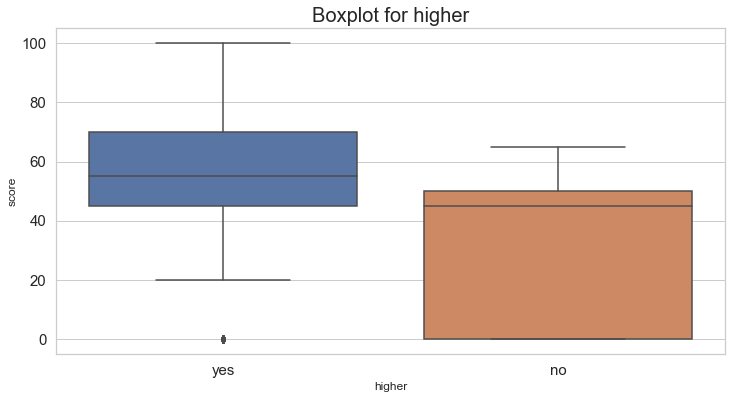

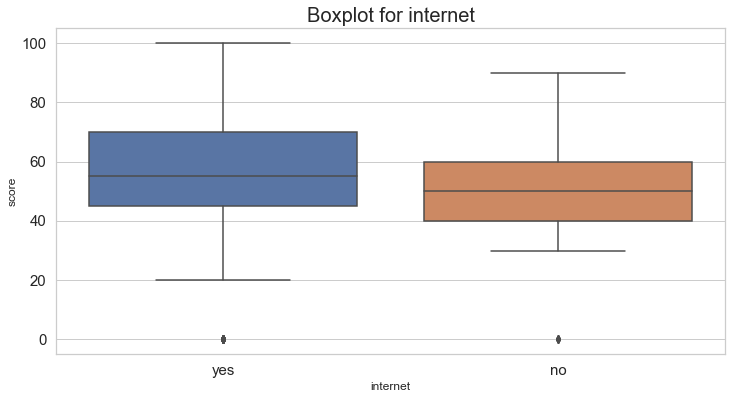

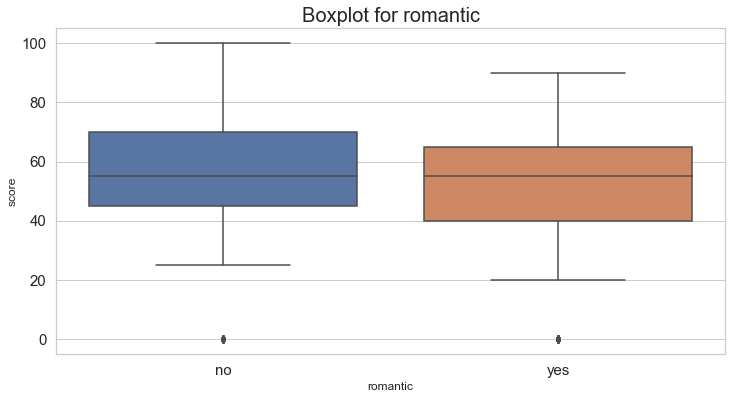

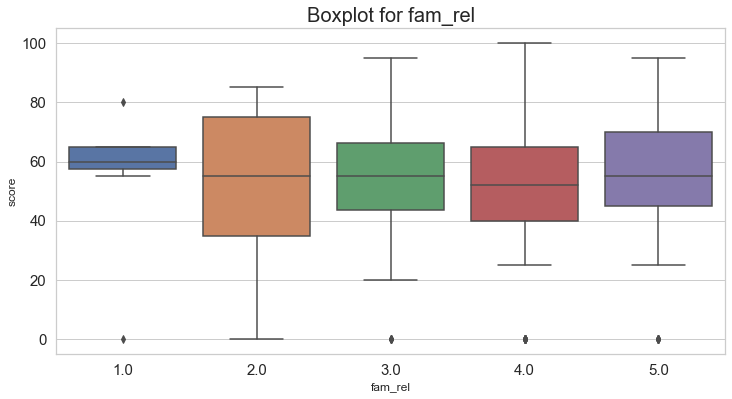

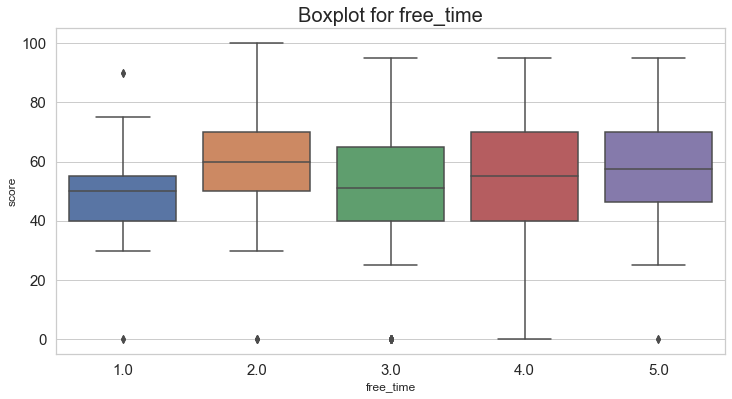

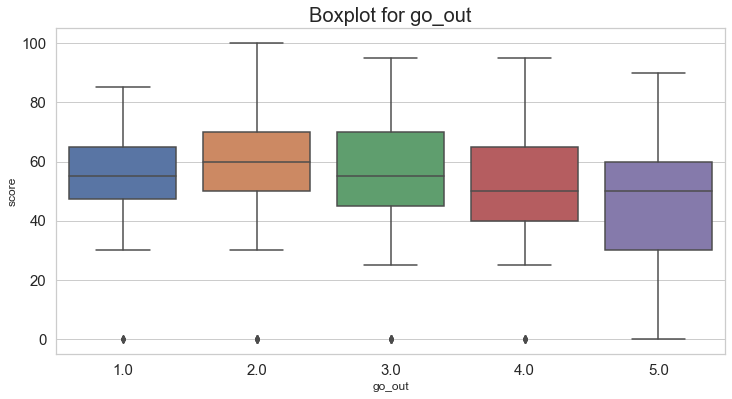

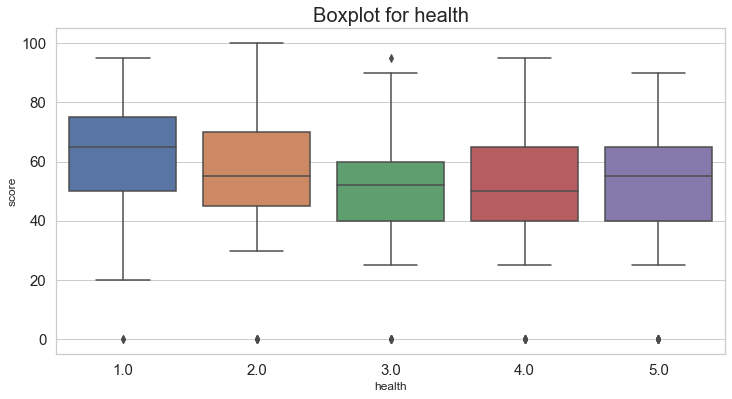

In [191]:
for col in new_data.columns:
    if col not in corr.index:
        box(col)

Boxplots allow to see some differences between the distributions of obrservations that belong to different categorial features.

Obviously, there are too many columns to make some certain conclusions just by a glimpse, so it is necessary to conduct Student's t-test to figure out statistically significant differences:

In [216]:
significant = []
for col in new_data.columns:  # Take all columns
    if col not in corr.index: # Don't include numeric features
        values = new_data.loc[:, col].value_counts().index  # Extract all possible categorial values
        combs = list(combinations(values, 2))  # Make combinations from those values

        for comb in combs:  # For each value from each combination conduct t-test
            pvalue = scipy.stats.ttest_ind(new_data.loc[new_data[col] == comb[0]].score,
                                           new_data.loc[new_data[col] == comb[1]].score).pvalue
            if pvalue <= 0.05 / len(combs):
                print(f'Statistically significant differences detected for column {col}')
                significant.append(col)
                break

Statistically significant differences detected for column m_edu
Statistically significant differences detected for column m_job
Statistically significant differences detected for column f_job
Statistically significant differences detected for column study_time
Statistically significant differences detected for column failures
Statistically significant differences detected for column school_sup
Statistically significant differences detected for column higher
Statistically significant differences detected for column go_out


**The only thing left is deleting unimportant columns:**

In [210]:
significant += list(corr.index)
print(significant)

['m_edu', 'm_job', 'f_job', 'study_time', 'failures', 'school_sup', 'higher', 'go_out', 'age', 'absences', 'score']


**So the dataset for ML model(s) looks approximately like this:**

In [213]:
new_data.drop(labels=[x for x in new_data.columns if x not in significant], axis=1, inplace=True)
display(new_data)
display(new_data.info())

,age,m_edu,m_job,f_job,study_time,failures,school_sup,higher,go_out,absences,score
0,18,4.0,at_home,teacher,2.0,0.0,yes,yes,4.0,6.0,30.0
1,17,1.0,at_home,other,2.0,0.0,no,yes,3.0,4.0,30.0
2,15,1.0,at_home,other,2.0,3.0,yes,yes,2.0,10.0,50.0
3,15,4.0,health,other,3.0,0.0,no,yes,2.0,2.0,75.0
4,16,3.0,other,other,2.0,0.0,no,yes,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,services,services,2.0,2.0,no,yes,4.0,4.0,45.0
391,17,3.0,services,services,1.0,0.0,no,yes,5.0,3.0,80.0
392,21,1.0,other,other,1.0,3.0,no,yes,3.0,3.0,35.0
393,18,3.0,services,other,1.0,0.0,no,yes,1.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         358 non-null    int64   
 1   m_edu       358 non-null    category
 2   m_job       358 non-null    object  
 3   f_job       358 non-null    object  
 4   study_time  358 non-null    category
 5   failures    358 non-null    category
 6   school_sup  358 non-null    object  
 7   higher      358 non-null    object  
 8   go_out      358 non-null    category
 9   absences    358 non-null    float64 
 10  score       358 non-null    float64 
dtypes: category(4), float64(2), int64(1), object(4)
memory usage: 34.5+ KB


None

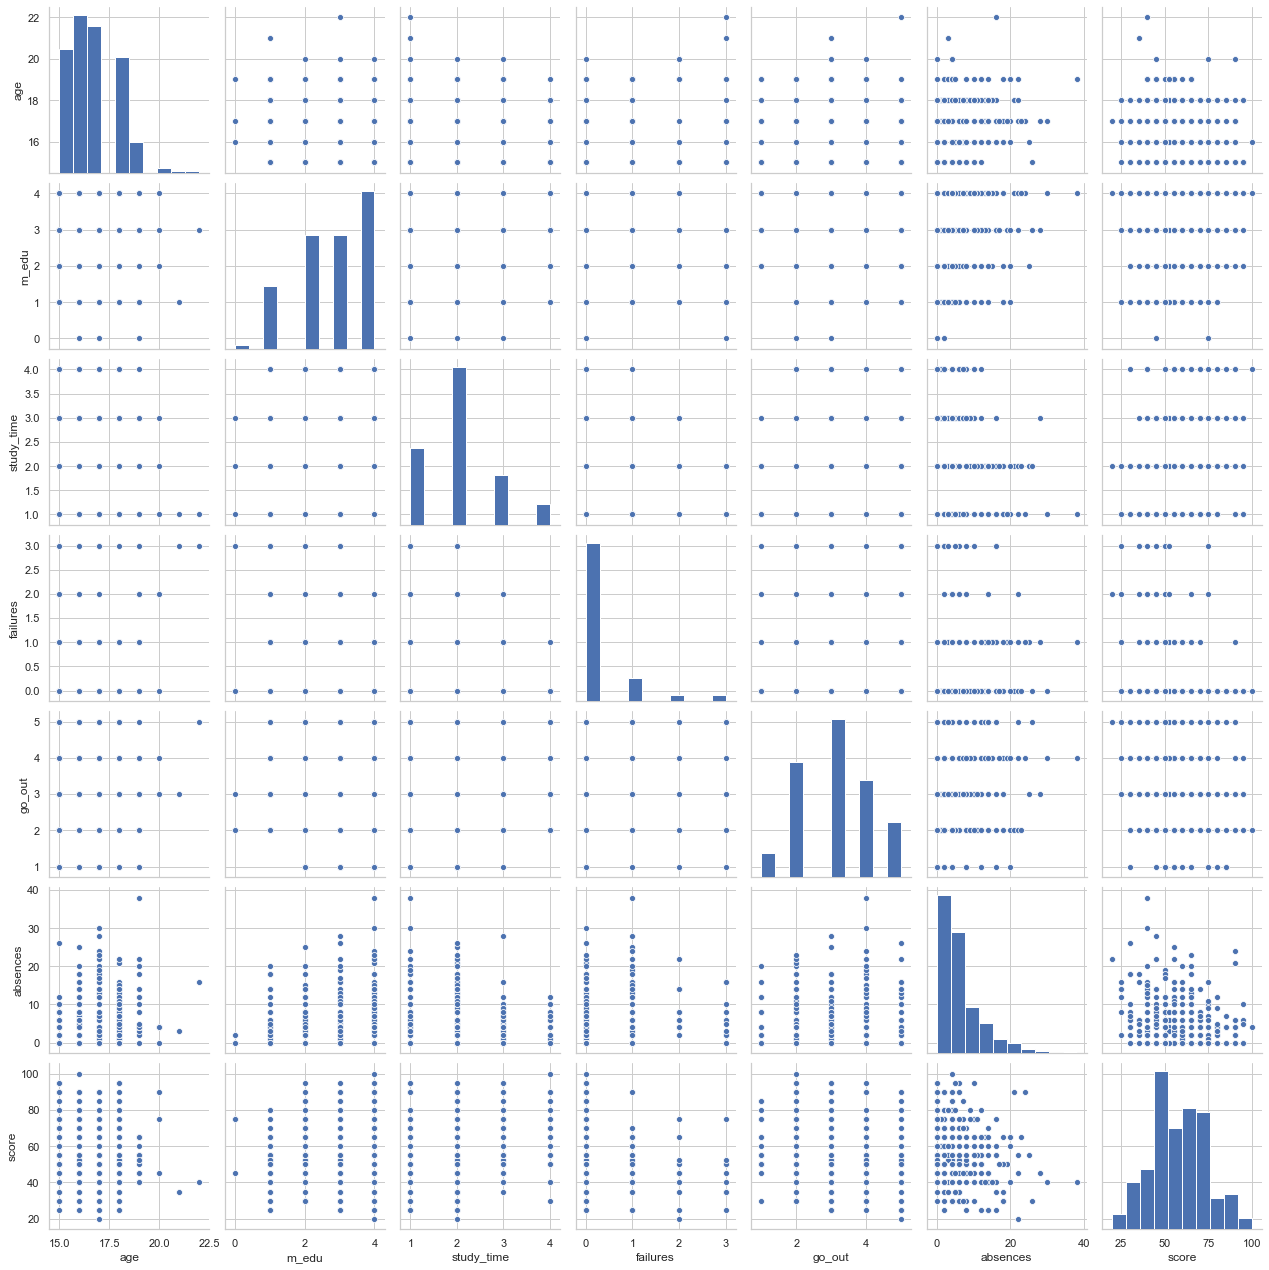

In [214]:
sns.pairplot(new_data)

In this case scatterplots are not really informative.

# Final conclusions

> * The general data quality could definitely be better as there are many missing values;
> * Lots of columns with rank values and values in which intervals are actually hidden. That makes the whole analysis more complicated;
> * There are 10 features that correlate with math exam score.